In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def metrics_summary(true_label, prediction_prob, Threshold=0.5):
    from sklearn.metrics import log_loss, accuracy_score, f1_score
    from sklearn.metrics import precision_recall_curve, average_precision_score
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from sklearn.metrics import confusion_matrix, classification_report
    #basically, slearn provides all the functions for metrics.
    average_precision = average_precision_score(true_label
    ,prediction_prob)
    fpr, tpr, thresholds = roc_curve(true_label, prediction_prob)
    areaUnderROC = auc(fpr, tpr)
    
    prediction_int = prediction_prob > Threshold
    
    accuracy = accuracy_score(true_label, prediction_int)
            
    print(f'accuracy: {accuracy}')
    print(f"average_precision: {average_precision}")
    print(f'areaUnderROC: {areaUnderROC } \n')
    print('*'*60)
    print(' '*20, 'classification_report')
    print('*'*60, "\n")
    print(classification_report(true_label, prediction_int))
    
    print('*'*60)
    print(' '*20, 'confusion_matrix \n')
    print('*'*60, "\n")
    display(confusion_matrix(true_label, prediction_int))
    print("\n")
    
    # precision_recall_curve and areaUnderROC 
    precision, recall, thresholds = precision_recall_curve( \
                                true_label, prediction_int)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
    
    ax1.step(recall, precision, color='k', alpha=0.7, where='post')
    ax1.fill_between(recall, precision, step='post', 
    alpha=0.3,color='k')
    ax1.set_xlabel('Recall', fontname="Arial", fontsize=24)
    ax1.set_ylabel('Precision', fontname="Arial", fontsize=24) 
    ax1.tick_params(labelsize=20)
     
    ax1.set_title('Precision-Recall curve: Average Precision \
    = {0:0.2f}'.format(average_precision), fontsize=24,
    fontname="Arial")        
               
    ax2.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    ax2.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    ax2.tick_params(labelsize=20)
    ax2.set_xlabel('False Positive Rate', fontname="Arial",
    fontsize=24)
    ax2.set_ylabel('True Positive Rate', fontname="Arial",
    fontsize=24)
    ax2.set_title('areaUnderROC = {0:0.2f}'\
            .format(areaUnderROC), fontsize=24, fontname="Arial",)    
    ax2.legend(loc="lower right", fontsize=24, fancybox=True) 
    # Adjust the subplot layout, because the logit one may take 
    #more space
    # than usual, due to y-tick labels like "1 - 10^{-3}"
    # plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10,
    # right=0.95, hspace=0.25,wspace=0.35)

In [2]:
active_promos_data=pd.read_csv('./Data/active_promos.csv',encoding='latin-1')
active_promos_data.name='active_promos'
clients_attributes_data=pd.read_csv('./Data/clients_attributes.csv',encoding='latin-1')
clients_attributes_data.name='clients_attributes'
executed_promos_data=pd.read_csv('./Data/executed_promos.csv',encoding='latin-1')
executed_promos_data.name='executed_promos'
sales_data=pd.read_csv('./Data/sales.csv',encoding='latin-1')
sales_data.name='sales_data'

In [3]:
print(f'\nTabla de {active_promos_data.name}\n')
display(active_promos_data)
print(f'\nTabla de {clients_attributes_data.name}\n')
display(clients_attributes_data)
print(f'\nTabla de {executed_promos_data.name}\n')
display(executed_promos_data)
print(f'\nTabla de {sales_data.name}\n')
display(sales_data)


Tabla de active_promos



,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
1,297601,29,9,2018-08-06,2018-08-30,3795
2,297601,29,9,2018-08-06,2018-08-30,11816
3,298856,40,16,2018-08-12,2018-08-19,8444
4,309916,40,16,2018-08-12,2018-08-19,8488
...,...,...,...,...,...,...
422432,688354,40,16,2019-09-25,2019-09-26,14435
422433,688355,29,9,2019-09-25,2019-09-26,320
422434,688355,29,9,2019-09-25,2019-09-26,3117
422435,688355,29,9,2019-09-25,2019-09-26,3503



Tabla de clients_attributes



,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2009-03-03,4,21,12,1,1,1
1,9,2009-03-03,4,21,9,2,3,1
2,15,2009-03-03,4,21,9,2,3,0
3,37,2009-03-03,4,21,16,2,3,1
4,43,2009-03-03,4,21,9,2,3,0
...,...,...,...,...,...,...,...,...
15064,15040,2019-03-07,1,16,9,2,1,0
15065,15043,2019-03-07,1,20,15,2,2,1
15066,15052,2019-03-09,3,7,10,2,2,0
15067,15065,2019-03-16,4,21,9,2,2,0



Tabla de executed_promos



,CodigoDC,Cliente,Marca,Cupo
0,297601,8410,29,9
1,297601,9337,29,9
2,309843,7404,40,16
3,309874,4017,40,16
4,309910,6316,40,16
...,...,...,...,...
27789,651436,9798,39,20
27790,651588,2397,39,20
27791,651597,4430,40,16
27792,651617,7347,39,20



Tabla de sales_data



,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0
...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0


# Analizamos si faltan datos 

In [4]:
def analizar_datos_faltantes(dataframe):
    max_rows=dataframe.shape[0]
    for NombreColumna,DataColumna in dataframe.iteritems():
        if DataColumna.notnull().sum()<max_rows:
            print(f'Valores nulos en la columna {NombreColumna} del dataset {dataframe.name}')
        else:
#             print(DataColumna.notnull().sum())
            print(f'No existen valores nulos en la columna {NombreColumna} del dataset {dataframe.name}')

In [5]:
print(f'\nTabla de {active_promos_data.name}\n')
analizar_datos_faltantes(active_promos_data)
print(f'\nTabla de {active_promos_data.name}\n')
analizar_datos_faltantes(active_promos_data)
print(f'\nTabla de {active_promos_data.name}\n')
analizar_datos_faltantes(active_promos_data)
print(f'\nTabla de {sales_data.name}\n')
analizar_datos_faltantes(sales_data)


Tabla de active_promos

No existen valores nulos en la columna CodigoDC del dataset active_promos
No existen valores nulos en la columna Marca del dataset active_promos
No existen valores nulos en la columna Cupo del dataset active_promos
No existen valores nulos en la columna Fecha_Desde del dataset active_promos
No existen valores nulos en la columna Fecha_Hasta del dataset active_promos
No existen valores nulos en la columna Cliente del dataset active_promos

Tabla de active_promos

No existen valores nulos en la columna CodigoDC del dataset active_promos
No existen valores nulos en la columna Marca del dataset active_promos
No existen valores nulos en la columna Cupo del dataset active_promos
No existen valores nulos en la columna Fecha_Desde del dataset active_promos
No existen valores nulos en la columna Fecha_Hasta del dataset active_promos
No existen valores nulos en la columna Cliente del dataset active_promos

Tabla de active_promos

No existen valores nulos en la columna Co

In [6]:
print(sales_data.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894252 entries, 0 to 1894251
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Cliente         1894252 non-null  int64  
 1   Año             1894252 non-null  int64  
 2   Mes             1894252 non-null  int64  
 3   ClaseEnvase     1894252 non-null  int64  
 4   SegmentoPrecio  1894247 non-null  float64
 5   Marca           1894252 non-null  int64  
 6   Cupo            1894247 non-null  float64
 7   Nr              1894252 non-null  float64
 8   Hl              1894252 non-null  float64
 9   Dcto            1894252 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 144.5 MB
None


# Unimos los Dataset en uno solo
### Esto se hace con el fin de que se pueda analizar toda la data y sus relaciones

In [7]:
def Comprobar_existencia_de_clientes(dataset):
    max_idcliente=max(dataset['Cliente'].unique())
#     print(max_idcliente)
    min_idcliente=min(dataset['Cliente'].unique())
#     print(min_idcliente)
    cantidad_clientes=max_idcliente-min_idcliente+1
    if cantidad_clientes==dataset['Cliente'].nunique():
        print(f'En el dataframe {dataset.name}, el id de todos los cliente es consecutivo y están comprendidos entre {min_idcliente} a {max_idcliente}')

In [8]:
Comprobar_existencia_de_clientes(sales_data)
Comprobar_existencia_de_clientes(clients_attributes_data)

En el dataframe sales_data, el id de todos los cliente es consecutivo y están comprendidos entre 1 a 15069
En el dataframe clients_attributes, el id de todos los cliente es consecutivo y están comprendidos entre 1 a 15069


In [9]:
sales_data_con_clients_attributes=pd.merge(sales_data,clients_attributes_data,how='left',on='Cliente')
sales_data_con_clients_attributes.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,2009-03-03,4,21,12,1,1,1
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,2009-03-03,4,21,12,1,1,1
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,2009-03-03,4,21,12,1,1,1
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,2009-03-03,4,21,12,1,1,1
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,2009-03-03,4,21,12,1,1,1


### Se agrega la columna Promocion_aceptada a la tabla executed_promos que será nuestro target
#### Adicionalmente, se juntan las tablas executed_promos y active_promos para que pueda ser usado eficientemente en el futuro

In [10]:
executed_promos_data['Promocion_aceptada']=1
display(executed_promos_data)

,CodigoDC,Cliente,Marca,Cupo,Promocion_aceptada
0,297601,8410,29,9,1
1,297601,9337,29,9,1
2,309843,7404,40,16,1
3,309874,4017,40,16,1
4,309910,6316,40,16,1
...,...,...,...,...,...
27789,651436,9798,39,20,1
27790,651588,2397,39,20,1
27791,651597,4430,40,16,1
27792,651617,7347,39,20,1


In [11]:
active_promos_con_executed_promos=active_promos_data.merge(executed_promos_data,how='left',on=['CodigoDC','Cliente','Marca','Cupo'])
active_promos_con_executed_promos.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Promocion_aceptada
0,297601,29,9,2018-08-06,2018-08-30,3213,NaN
1,297601,29,9,2018-08-06,2018-08-30,3795,NaN
2,297601,29,9,2018-08-06,2018-08-30,11816,1.0
3,298856,40,16,2018-08-12,2018-08-19,8444,1.0
4,309916,40,16,2018-08-12,2018-08-19,8488,1.0


### Validamos si todas las promociones aceptadas fueron acopladas adecuadamente 

In [12]:
if active_promos_con_executed_promos['Promocion_aceptada'].notna().sum()==executed_promos_data.shape[0]:
    print('Todas las promociones fueron acopladas adecuadamente')

Todas las promociones fueron acopladas adecuadamente


### Se debe modificar la tabla de active_promos_con_executed_promos para que pueda ser utilizado de manera más eficiente 

In [13]:
display(active_promos_con_executed_promos)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Promocion_aceptada
0,297601,29,9,2018-08-06,2018-08-30,3213,NaN
1,297601,29,9,2018-08-06,2018-08-30,3795,NaN
2,297601,29,9,2018-08-06,2018-08-30,11816,1.0
3,298856,40,16,2018-08-12,2018-08-19,8444,1.0
4,309916,40,16,2018-08-12,2018-08-19,8488,1.0
...,...,...,...,...,...,...,...
422432,688354,40,16,2019-09-25,2019-09-26,14435,NaN
422433,688355,29,9,2019-09-25,2019-09-26,320,NaN
422434,688355,29,9,2019-09-25,2019-09-26,3117,NaN
422435,688355,29,9,2019-09-25,2019-09-26,3503,NaN


In [14]:
active_promos_con_executed_promos['Promocion_aceptada']=active_promos_con_executed_promos['Promocion_aceptada'].apply(lambda x: 0 if x!=1.0 else x)
active_promos_con_executed_promos['Promocion_aceptada'].value_counts()

0.0    394643
1.0     27794
Name: Promocion_aceptada, dtype: int64

In [15]:
def convertir_a_datetime(dataframe,columnas,formato_fecha='%Y-%m-%d'):
    dataframe_output=dataframe.copy()
    for columna in columnas:
#         dataframe_output[columna]=dataframe[columna].apply(lambda x:  pd.to_datetime(x,formato_fecha))
        dataframe_output[columna]=pd.to_datetime(dataframe[columna],format=formato_fecha)
    return dataframe_output
def convertir_timedelta_a_float_dias(value):
    return value/np.timedelta64(1, 'D')
def convertir_timedelta_a_float_meses(value):
    return value/np.timedelta64(1, 'M')

In [16]:
active_promos_con_executed_promos_convertido_fechas=convertir_a_datetime(active_promos_con_executed_promos,['Fecha_Hasta','Fecha_Desde'])
active_promos_con_executed_promos_convertido_fechas['Año_inicio']=active_promos_con_executed_promos_convertido_fechas['Fecha_Desde'].dt.year
active_promos_con_executed_promos_convertido_fechas['Mes_inicio']=active_promos_con_executed_promos_convertido_fechas['Fecha_Desde'].dt.month
active_promos_con_executed_promos_convertido_fechas['Dia_inicio']=active_promos_con_executed_promos_convertido_fechas['Fecha_Desde'].dt.day
active_promos_con_executed_promos_convertido_fechas['Año_fin']=active_promos_con_executed_promos_convertido_fechas['Fecha_Hasta'].dt.year
active_promos_con_executed_promos_convertido_fechas['Mes_fin']=active_promos_con_executed_promos_convertido_fechas['Fecha_Hasta'].dt.month
active_promos_con_executed_promos_convertido_fechas['Dia_fin']=active_promos_con_executed_promos_convertido_fechas['Fecha_Hasta'].dt.day
# active_promos_con_executed_promos_convertido_fechas['Duracion_Dias_Promo']=convertir_timedelta_a_float_dias(active_promos_con_executed_promos_convertido_fechas['Fecha_Hasta']-active_promos_con_executed_promos_convertido_fechas['Fecha_Desde'])
active_promos_con_executed_promos_convertido_fechas.drop(labels=['Fecha_Desde','Fecha_Hasta'],axis=1,inplace=True)

In [17]:
display(active_promos_con_executed_promos_convertido_fechas)

,CodigoDC,Marca,Cupo,Cliente,Promocion_aceptada,Año_inicio,Mes_inicio,Dia_inicio,Año_fin,Mes_fin,Dia_fin
0,297601,29,9,3213,0.0,2018,8,6,2018,8,30
1,297601,29,9,3795,0.0,2018,8,6,2018,8,30
2,297601,29,9,11816,1.0,2018,8,6,2018,8,30
3,298856,40,16,8444,1.0,2018,8,12,2018,8,19
4,309916,40,16,8488,1.0,2018,8,12,2018,8,19
...,...,...,...,...,...,...,...,...,...,...,...
422432,688354,40,16,14435,0.0,2019,9,25,2019,9,26
422433,688355,29,9,320,0.0,2019,9,25,2019,9,26
422434,688355,29,9,3117,0.0,2019,9,25,2019,9,26
422435,688355,29,9,3503,0.0,2019,9,25,2019,9,26


### Unimos las tabla active_promos_con_executed_promos con la sales_data_con_clients_attributes para obtener la tabla final

## Analizando la nueva tabla

In [18]:
dataset_temporal_1=active_promos_con_executed_promos_convertido_fechas.copy()

### No existen promos entre años distintos 

In [19]:
#No existe año diferente entre el periodo de la promoción
dataset_temporal_1[dataset_temporal_1['Año_inicio']!=dataset_temporal_1['Año_fin']]

,CodigoDC,Marca,Cupo,Cliente,Promocion_aceptada,Año_inicio,Mes_inicio,Dia_inicio,Año_fin,Mes_fin,Dia_fin


In [20]:
#Analizamos si el codigoDC, Cliente, Cupo, Marca pueden repetirse, ya que si se repitiera esto, se tendría varios descuentos sobre un mismo producto
#a un mismo cliente y con el mismo código lo que sería un problema en la logística.
dataset_temporal_1[['Cliente','Marca','Cupo','CodigoDC']].duplicated().sum()

0

In [21]:
dataset_temporal_2=pd.pivot_table(dataset_temporal_1, values='CodigoDC', index=['Cliente','Marca','Cupo','Año_inicio','Mes_inicio'],columns=['Mes_fin'], aggfunc=np.count_nonzero)

In [22]:
#Se observa que hay promos que duran más de 1 mes o que cambian de mes en su tiempo de validez.
dataset_temporal_2

Mes_fin                                   1   2   3   4   5   6    7    8   \
Cliente Marca Cupo Año_inicio Mes_inicio                                     
1       29    9    2019       8          NaN NaN NaN NaN NaN NaN  NaN  1.0   
                              9          NaN NaN NaN NaN NaN NaN  NaN  NaN   
        39    20   2018       9          NaN NaN NaN NaN NaN NaN  NaN  NaN   
                              10         NaN NaN NaN NaN NaN NaN  NaN  NaN   
                              11         NaN NaN NaN NaN NaN NaN  NaN  NaN   
...                                       ..  ..  ..  ..  ..  ..  ...  ...   
15068   39    20   2019       9          NaN NaN NaN NaN NaN NaN  NaN  NaN   
        40    16   2019       7          NaN NaN NaN NaN NaN NaN  1.0  NaN   
                              8          NaN NaN NaN NaN NaN NaN  NaN  2.0   
                              9          NaN NaN NaN NaN NaN NaN  NaN  NaN   
15069   40    16   2019       5          NaN NaN NaN NaN NaN NaN  NaN  NaN   

Mes_fin                                    9    10   11  12  
Cliente Marca Cupo Año_inicio Mes_inicio                     
1       29    9    2019       8           NaN  NaN  NaN NaN  
                              9           2.0  NaN  NaN NaN  
        39    20   2018       9           4.0  NaN  NaN NaN  
                              10          NaN  3.0  NaN NaN  
                              11          NaN  NaN  4.0 NaN  
...                                       ...  ...  ...  ..  
15068   39    20   2019       9           1.0  NaN  NaN NaN  
        40    16   2019       7           NaN  NaN  NaN NaN  
                              8           NaN  NaN  NaN NaN  
                              9           1.0  NaN  NaN NaN  
15069   40    16   2019       5           NaN  1.0  NaN NaN  

[168790 rows x 12 columns]

### Analizando el caso en el que los meses son distintos

In [23]:
index_meses_distintos=dataset_temporal_1['Mes_inicio']!=dataset_temporal_1['Mes_fin']
dataset_temporal_3=dataset_temporal_1[index_meses_distintos].copy()
dataset_temporal_3['Diferencia_meses']=dataset_temporal_3['Mes_fin']-dataset_temporal_3['Mes_inicio']
# convertir_timedelta_a_float_meses
display(dataset_temporal_3)
print(dataset_temporal_3['Diferencia_meses'].value_counts())

,CodigoDC,Marca,Cupo,Cliente,Promocion_aceptada,Año_inicio,Mes_inicio,Dia_inicio,Año_fin,Mes_fin,Dia_fin,Diferencia_meses
365,354346,40,16,436,0.0,2018,8,31,2018,9,13,1
366,354346,40,16,1025,1.0,2018,8,31,2018,9,13,1
367,354346,40,16,2220,0.0,2018,8,31,2018,9,13,1
368,354346,40,16,3003,1.0,2018,8,31,2018,9,13,1
369,354346,40,16,3014,0.0,2018,8,31,2018,9,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...
416368,652144,39,20,14114,0.0,2019,8,31,2019,9,8,1
416369,652144,39,20,14852,0.0,2019,8,31,2019,9,8,1
416370,652144,40,16,2113,1.0,2019,8,31,2019,9,8,1
416371,652144,40,16,7864,0.0,2019,8,31,2019,9,8,1


5    1820
1     584
Name: Diferencia_meses, dtype: int64


### Debido a que existen más de 1 caso (diferencia de 5 o de 1 mes), se hará una función que genere data con respecto a este input 

In [24]:
def agregar_datos_meses_distintos(dataframe):
    dataframe_output=pd.DataFrame(columns=dataframe.columns)
    for row_index,row_value in dataframe.iterrows():
        cantidad_a_replicar=int(row_value['Diferencia_meses'])
#         print(cantidad_a_replicar)
        mes_inicial=row_value['Mes_inicio']
        for i in range(1,cantidad_a_replicar+1):#Debido a que el último valor no se toma en cuenta, se le suma uno a este para que sí lo tome.
            row_value['Mes_inicio']=mes_inicial+i
            dataframe_output=pd.concat([dataframe_output,pd.DataFrame([row_value],columns=row_value.index)],ignore_index=True)
#             dataframe_output=dataframe_output.append(row_value)
    return dataframe_output

In [25]:
import time
time_init=time.time()
dataset_a_agregar=agregar_datos_meses_distintos(dataset_temporal_3)
time_end=time.time()
duracion=time_end-time_init
print(duracion)

12.178029775619507


In [26]:
display(dataset_a_agregar[dataset_a_agregar['Mes_fin']==10])

,CodigoDC,Marca,Cupo,Cliente,Promocion_aceptada,Año_inicio,Mes_inicio,Dia_inicio,Año_fin,Mes_fin,Dia_fin,Diferencia_meses
420,617780.0,40.0,16.0,1196.0,0.0,2019.0,6.0,6.0,2019.0,10.0,13.0,5.0
421,617780.0,40.0,16.0,1196.0,0.0,2019.0,7.0,6.0,2019.0,10.0,13.0,5.0
422,617780.0,40.0,16.0,1196.0,0.0,2019.0,8.0,6.0,2019.0,10.0,13.0,5.0
423,617780.0,40.0,16.0,1196.0,0.0,2019.0,9.0,6.0,2019.0,10.0,13.0,5.0
424,617780.0,40.0,16.0,1196.0,0.0,2019.0,10.0,6.0,2019.0,10.0,13.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9645,617782.0,40.0,16.0,14877.0,0.0,2019.0,6.0,6.0,2019.0,10.0,13.0,5.0
9646,617782.0,40.0,16.0,14877.0,0.0,2019.0,7.0,6.0,2019.0,10.0,13.0,5.0
9647,617782.0,40.0,16.0,14877.0,0.0,2019.0,8.0,6.0,2019.0,10.0,13.0,5.0
9648,617782.0,40.0,16.0,14877.0,0.0,2019.0,9.0,6.0,2019.0,10.0,13.0,5.0


In [27]:
display(dataset_temporal_1)
display(dataset_a_agregar)

,CodigoDC,Marca,Cupo,Cliente,Promocion_aceptada,Año_inicio,Mes_inicio,Dia_inicio,Año_fin,Mes_fin,Dia_fin
0,297601,29,9,3213,0.0,2018,8,6,2018,8,30
1,297601,29,9,3795,0.0,2018,8,6,2018,8,30
2,297601,29,9,11816,1.0,2018,8,6,2018,8,30
3,298856,40,16,8444,1.0,2018,8,12,2018,8,19
4,309916,40,16,8488,1.0,2018,8,12,2018,8,19
...,...,...,...,...,...,...,...,...,...,...,...
422432,688354,40,16,14435,0.0,2019,9,25,2019,9,26
422433,688355,29,9,320,0.0,2019,9,25,2019,9,26
422434,688355,29,9,3117,0.0,2019,9,25,2019,9,26
422435,688355,29,9,3503,0.0,2019,9,25,2019,9,26


,CodigoDC,Marca,Cupo,Cliente,Promocion_aceptada,Año_inicio,Mes_inicio,Dia_inicio,Año_fin,Mes_fin,Dia_fin,Diferencia_meses
0,354346.0,40.0,16.0,436.0,0.0,2018.0,9.0,31.0,2018.0,9.0,13.0,1.0
1,354346.0,40.0,16.0,1025.0,1.0,2018.0,9.0,31.0,2018.0,9.0,13.0,1.0
2,354346.0,40.0,16.0,2220.0,0.0,2018.0,9.0,31.0,2018.0,9.0,13.0,1.0
3,354346.0,40.0,16.0,3003.0,1.0,2018.0,9.0,31.0,2018.0,9.0,13.0,1.0
4,354346.0,40.0,16.0,3014.0,0.0,2018.0,9.0,31.0,2018.0,9.0,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9679,652144.0,39.0,20.0,14114.0,0.0,2019.0,9.0,31.0,2019.0,9.0,8.0,1.0
9680,652144.0,39.0,20.0,14852.0,0.0,2019.0,9.0,31.0,2019.0,9.0,8.0,1.0
9681,652144.0,40.0,16.0,2113.0,1.0,2019.0,9.0,31.0,2019.0,9.0,8.0,1.0
9682,652144.0,40.0,16.0,7864.0,0.0,2019.0,9.0,31.0,2019.0,9.0,8.0,1.0


In [28]:
dataframe_promos_completa=pd.concat([dataset_temporal_1,dataset_a_agregar],ignore_index=True)
display(dataframe_promos_completa)

,CodigoDC,Marca,Cupo,Cliente,Promocion_aceptada,Año_inicio,Mes_inicio,Dia_inicio,Año_fin,Mes_fin,Dia_fin,Diferencia_meses
0,297601.0,29.0,9.0,3213.0,0.0,2018.0,8.0,6.0,2018.0,8.0,30.0,NaN
1,297601.0,29.0,9.0,3795.0,0.0,2018.0,8.0,6.0,2018.0,8.0,30.0,NaN
2,297601.0,29.0,9.0,11816.0,1.0,2018.0,8.0,6.0,2018.0,8.0,30.0,NaN
3,298856.0,40.0,16.0,8444.0,1.0,2018.0,8.0,12.0,2018.0,8.0,19.0,NaN
4,309916.0,40.0,16.0,8488.0,1.0,2018.0,8.0,12.0,2018.0,8.0,19.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
432116,652144.0,39.0,20.0,14114.0,0.0,2019.0,9.0,31.0,2019.0,9.0,8.0,1.0
432117,652144.0,39.0,20.0,14852.0,0.0,2019.0,9.0,31.0,2019.0,9.0,8.0,1.0
432118,652144.0,40.0,16.0,2113.0,1.0,2019.0,9.0,31.0,2019.0,9.0,8.0,1.0
432119,652144.0,40.0,16.0,7864.0,0.0,2019.0,9.0,31.0,2019.0,9.0,8.0,1.0


### Debido a que ya se resolvió el problema de los meses distintos, se puede agrupar con respecto al mes inicio de modo que exprese la verdadera cantidad de promos por mes

In [29]:
dataset_promocion_aceptada=dataframe_promos_completa.groupby(by=['Cliente','Marca','Cupo','Año_inicio','Mes_inicio']).max()[['Promocion_aceptada']]

In [30]:
dataset_groupby=dataframe_promos_completa.groupby(by=['Cliente','Marca','Cupo','Año_inicio','Mes_inicio']).count()[['CodigoDC']]
dataset_groupby.rename(columns={'CodigoDC': 'Cantidad_promos_mes'},inplace=True)
dataset_promos_groupby=pd.merge(dataset_groupby,dataset_promocion_aceptada,how='left',left_index=True,right_index=True)
display(dataset_groupby)
display(dataset_promos_groupby)

Cantidad_promos_mes
Cliente Marca Cupo Año_inicio Mes_inicio                     
1.0     29.0  9.0  2019.0     8.0                           1
                              9.0                           2
        39.0  20.0 2018.0     9.0                           4
                              10.0                          3
                              11.0                          4
...                                                       ...
15069.0 40.0  16.0 2019.0     6.0                           1
                              7.0                           1
                              8.0                           1
                              9.0                           1
                              10.0                          1

[176367 rows x 1 columns]

Cantidad_promos_mes  \
Cliente Marca Cupo Año_inicio Mes_inicio                        
1.0     29.0  9.0  2019.0     8.0                           1   
                              9.0                           2   
        39.0  20.0 2018.0     9.0                           4   
                              10.0                          3   
                              11.0                          4   
...                                                       ...   
15069.0 40.0  16.0 2019.0     6.0                           1   
                              7.0                           1   
                              8.0                           1   
                              9.0                           1   
                              10.0                          1   

                                          Promocion_aceptada  
Cliente Marca Cupo Año_inicio Mes_inicio                      
1.0     29.0  9.0  2019.0     8.0                        0.0  
                              9.0                        0.0  
        39.0  20.0 2018.0     9.0                        0.0  
                              10.0                       0.0  
                              11.0                       0.0  
...                                                      ...  
15069.0 40.0  16.0 2019.0     6.0                        0.0  
                              7.0                        0.0  
                              8.0                        0.0  
                              9.0                        0.0  
                              10.0                       0.0  

[176367 rows x 2 columns]

In [31]:
dataset_promos_groupby['Promocion_aceptada'].value_counts()

0.0    150019
1.0     26348
Name: Promocion_aceptada, dtype: int64

# Uniendo Datasets 

In [32]:
display(dataset_promos_groupby)
display(sales_data_con_clients_attributes)

Cantidad_promos_mes  \
Cliente Marca Cupo Año_inicio Mes_inicio                        
1.0     29.0  9.0  2019.0     8.0                           1   
                              9.0                           2   
        39.0  20.0 2018.0     9.0                           4   
                              10.0                          3   
                              11.0                          4   
...                                                       ...   
15069.0 40.0  16.0 2019.0     6.0                           1   
                              7.0                           1   
                              8.0                           1   
                              9.0                           1   
                              10.0                          1   

                                          Promocion_aceptada  
Cliente Marca Cupo Año_inicio Mes_inicio                      
1.0     29.0  9.0  2019.0     8.0                        0.0  
                              9.0                        0.0  
        39.0  20.0 2018.0     9.0                        0.0  
                              10.0                       0.0  
                              11.0                       0.0  
...                                                      ...  
15069.0 40.0  16.0 2019.0     6.0                        0.0  
                              7.0                        0.0  
                              8.0                        0.0  
                              9.0                        0.0  
                              10.0                       0.0  

[176367 rows x 2 columns]

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,2009-03-03,4,21,12,1,1,1
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,2009-03-03,4,21,12,1,1,1
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,2009-03-03,4,21,12,1,1,1
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,2009-03-03,4,21,12,1,1,1
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,2009-03-03,4,21,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0,2019-03-18,1,5,9,2,3,1
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0,2019-03-18,4,14,9,2,1,0
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0,2019-03-18,4,14,9,2,1,0
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0,2019-03-18,4,14,9,2,1,0


In [33]:
client_con_promos_union=pd.merge(sales_data_con_clients_attributes,dataset_promos_groupby,right_index=True,how='left',left_on=['Cliente','Marca','Cupo','Año','Mes'],right_on=['Cliente','Marca','Cupo','Año_inicio','Mes_inicio'])
display(client_con_promos_union)

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Cantidad_promos_mes,Promocion_aceptada
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,2009-03-03,4,21,12,1,1,1,NaN,NaN
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,2009-03-03,4,21,12,1,1,1,NaN,NaN
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,2009-03-03,4,21,12,1,1,1,NaN,NaN
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,2009-03-03,4,21,12,1,1,1,NaN,NaN
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,2009-03-03,4,21,12,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0,2019-03-18,1,5,9,2,3,1,NaN,NaN
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0,2019-03-18,4,14,9,2,1,0,NaN,NaN
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0,2019-03-18,4,14,9,2,1,0,NaN,NaN
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0,2019-03-18,4,14,9,2,1,0,NaN,NaN


In [34]:
client_con_promos_union[(client_con_promos_union[['Cliente','Marca','Cupo','Año']]==[1,29,9,2019]).all(axis=1)]

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Cantidad_promos_mes,Promocion_aceptada
3102,1,2019,6,1,4.0,29,9.0,11267.22,0.02,0.0,2009-03-03,4,21,12,1,1,1,NaN,NaN


### Reemplazamos los np.nan con 0 en la columna cantidad_promos_mes

In [35]:
client_con_promos_union_sin_ceros=client_con_promos_union.copy()
client_con_promos_union_sin_ceros['Cantidad_promos_mes'][client_con_promos_union_sin_ceros['Cantidad_promos_mes'].isnull()]=0
client_con_promos_union_sin_ceros['Promocion_aceptada'][client_con_promos_union_sin_ceros['Promocion_aceptada'].isnull()]=0
display(client_con_promos_union_sin_ceros)
print(client_con_promos_union_sin_ceros['Cantidad_promos_mes'].value_counts())
print(client_con_promos_union_sin_ceros['Promocion_aceptada'].value_counts())

D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Cantidad_promos_mes,Promocion_aceptada
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,2009-03-03,4,21,12,1,1,1,0.0,0.0
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,2009-03-03,4,21,12,1,1,1,0.0,0.0
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,2009-03-03,4,21,12,1,1,1,0.0,0.0
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,2009-03-03,4,21,12,1,1,1,0.0,0.0
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,2009-03-03,4,21,12,1,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0,2019-03-18,1,5,9,2,3,1,0.0,0.0
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0,2019-03-18,4,14,9,2,1,0,0.0,0.0
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0,2019-03-18,4,14,9,2,1,0,0.0,0.0
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0,2019-03-18,4,14,9,2,1,0,0.0,0.0


0.0     1843732
1.0       14156
4.0       12133
3.0       11010
2.0        7857
5.0        3133
6.0        1406
7.0         662
8.0         148
9.0          14
10.0          1
Name: Cantidad_promos_mes, dtype: int64
0.0    1871850
1.0      22402
Name: Promocion_aceptada, dtype: int64


### Separamos la columna FechaAltaCliente  

In [36]:
client_con_promos_union_sin_ceros_convertido=convertir_a_datetime(client_con_promos_union_sin_ceros,['FechaAltaCliente'])
client_con_promos_union_sin_ceros_convertido['Año_alta']=client_con_promos_union_sin_ceros_convertido['FechaAltaCliente'].dt.year
client_con_promos_union_sin_ceros_convertido['Mes_alta']=client_con_promos_union_sin_ceros_convertido['FechaAltaCliente'].dt.month
client_con_promos_union_sin_ceros_convertido['Dia_alta']=client_con_promos_union_sin_ceros_convertido['FechaAltaCliente'].dt.day
# active_promos_con_executed_promos_convertido_fechas['Duracion_Dias_Promo']=convertir_timedelta_a_float_dias(active_promos_con_executed_promos_convertido_fechas['Fecha_Hasta']-active_promos_con_executed_promos_convertido_fechas['Fecha_Desde'])
client_con_promos_union_sin_ceros_convertido.drop(labels=['FechaAltaCliente'],axis=1,inplace=True)
display(client_con_promos_union_sin_ceros_convertido)

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,...,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Cantidad_promos_mes,Promocion_aceptada,Año_alta,Mes_alta,Dia_alta
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,...,21,12,1,1,1,0.0,0.0,2009,3,3
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,...,21,12,1,1,1,0.0,0.0,2009,3,3
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,...,21,12,1,1,1,0.0,0.0,2009,3,3
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,...,21,12,1,1,1,0.0,0.0,2009,3,3
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,...,21,12,1,1,1,0.0,0.0,2009,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0,...,5,9,2,3,1,0.0,0.0,2019,3,18
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0,...,14,9,2,1,0,0.0,0.0,2019,3,18
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0,...,14,9,2,1,0,0.0,0.0,2019,3,18
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0,...,14,9,2,1,0,0.0,0.0,2019,3,18


# Imputation Null

In [37]:
#Como el Null está en Cupo y este es muy importante para el objetivo de negocio que deseamos realizar, se eliminarán las columnas
#con valores nulos. Adicionalmente, estos son pocos (5)
client_con_promos_union_sin_ceros_convertido.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894252 entries, 0 to 1894251
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Cliente              1894252 non-null  int64  
 1   Año                  1894252 non-null  int64  
 2   Mes                  1894252 non-null  int64  
 3   ClaseEnvase          1894252 non-null  int64  
 4   SegmentoPrecio       1894247 non-null  float64
 5   Marca                1894252 non-null  int64  
 6   Cupo                 1894247 non-null  float64
 7   Nr                   1894252 non-null  float64
 8   Hl                   1894252 non-null  float64
 9   Dcto                 1894252 non-null  float64
 10  Region               1894252 non-null  int64  
 11  Gerencia             1894252 non-null  int64  
 12  SubCanal             1894252 non-null  int64  
 13  TipoPoblacion        1894252 non-null  int64  
 14  Estrato              1894252 non-null  int64  
 15

In [38]:
client_con_promos_union_sin_nulos=client_con_promos_union_sin_ceros_convertido.dropna().copy()
client_con_promos_union_sin_nulos.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894247 entries, 0 to 1894251
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Cliente              1894247 non-null  int64  
 1   Año                  1894247 non-null  int64  
 2   Mes                  1894247 non-null  int64  
 3   ClaseEnvase          1894247 non-null  int64  
 4   SegmentoPrecio       1894247 non-null  float64
 5   Marca                1894247 non-null  int64  
 6   Cupo                 1894247 non-null  float64
 7   Nr                   1894247 non-null  float64
 8   Hl                   1894247 non-null  float64
 9   Dcto                 1894247 non-null  float64
 10  Region               1894247 non-null  int64  
 11  Gerencia             1894247 non-null  int64  
 12  SubCanal             1894247 non-null  int64  
 13  TipoPoblacion        1894247 non-null  int64  
 14  Estrato              1894247 non-null  int64  
 15

# Data Visualization 

In [39]:
display(client_con_promos_union_sin_nulos)

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,...,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Cantidad_promos_mes,Promocion_aceptada,Año_alta,Mes_alta,Dia_alta
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,...,21,12,1,1,1,0.0,0.0,2009,3,3
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,...,21,12,1,1,1,0.0,0.0,2009,3,3
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,...,21,12,1,1,1,0.0,0.0,2009,3,3
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,...,21,12,1,1,1,0.0,0.0,2009,3,3
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,...,21,12,1,1,1,0.0,0.0,2009,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0,...,5,9,2,3,1,0.0,0.0,2019,3,18
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0,...,14,9,2,1,0,0.0,0.0,2019,3,18
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0,...,14,9,2,1,0,0.0,0.0,2019,3,18
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0,...,14,9,2,1,0,0.0,0.0,2019,3,18


### Debido a que hay muchos datos en el que no se acepto la oferta y pocos en el que sí, se hará over sampling para obtener un mejor insight de las características importantes 

In [40]:
relacion=client_con_promos_union_sin_nulos[client_con_promos_union_sin_nulos['Promocion_aceptada']==0].shape[0]/client_con_promos_union_sin_nulos[client_con_promos_union_sin_nulos['Promocion_aceptada']==1].shape[0]
print(relacion)

83.55704847781448


In [41]:
dataset_oversampling=client_con_promos_union_sin_nulos[client_con_promos_union_sin_nulos['Promocion_aceptada']==1].copy()
dataframe_output=dataset_oversampling.copy()
time_init=time.time()
for i in range(int(relacion-1)):#El dataset ya posee una réplica de este oversampling
    dataframe_output=pd.concat([dataframe_output,dataset_oversampling],ignore_index=True)
print(dataframe_output.shape)
time_fin=time.time()
print(time_fin-time_init)

(1859366, 21)
20.47400689125061


In [42]:
dataframe_output_visualization=pd.concat([dataframe_output,client_con_promos_union_sin_nulos],ignore_index=True)
display(dataframe_output_visualization)

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,...,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Cantidad_promos_mes,Promocion_aceptada,Año_alta,Mes_alta,Dia_alta
0,14,2019,4,2,1.0,40,16.0,12909.04,0.06,-6253.02,...,21,15,2,3,0,1.0,1.0,2009,3,3
1,15,2019,5,2,1.0,40,16.0,12909.04,0.06,-6253.02,...,21,9,2,3,0,1.0,1.0,2009,3,3
2,15,2019,6,2,1.0,40,16.0,12909.04,0.06,-6253.02,...,21,9,2,3,0,1.0,1.0,2009,3,3
3,17,2019,1,2,1.0,40,16.0,45540.30,0.15,-2083.20,...,21,15,2,5,1,1.0,1.0,2009,3,3
4,18,2019,4,2,1.0,40,16.0,22474.12,0.09,-6253.02,...,21,7,2,3,1,1.0,1.0,2009,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753608,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.00,...,5,9,2,3,1,0.0,0.0,2019,3,18
3753609,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.00,...,14,9,2,1,0,0.0,0.0,2019,3,18
3753610,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.00,...,14,9,2,1,0,0.0,0.0,2019,3,18
3753611,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.00,...,14,9,2,1,0,0.0,0.0,2019,3,18


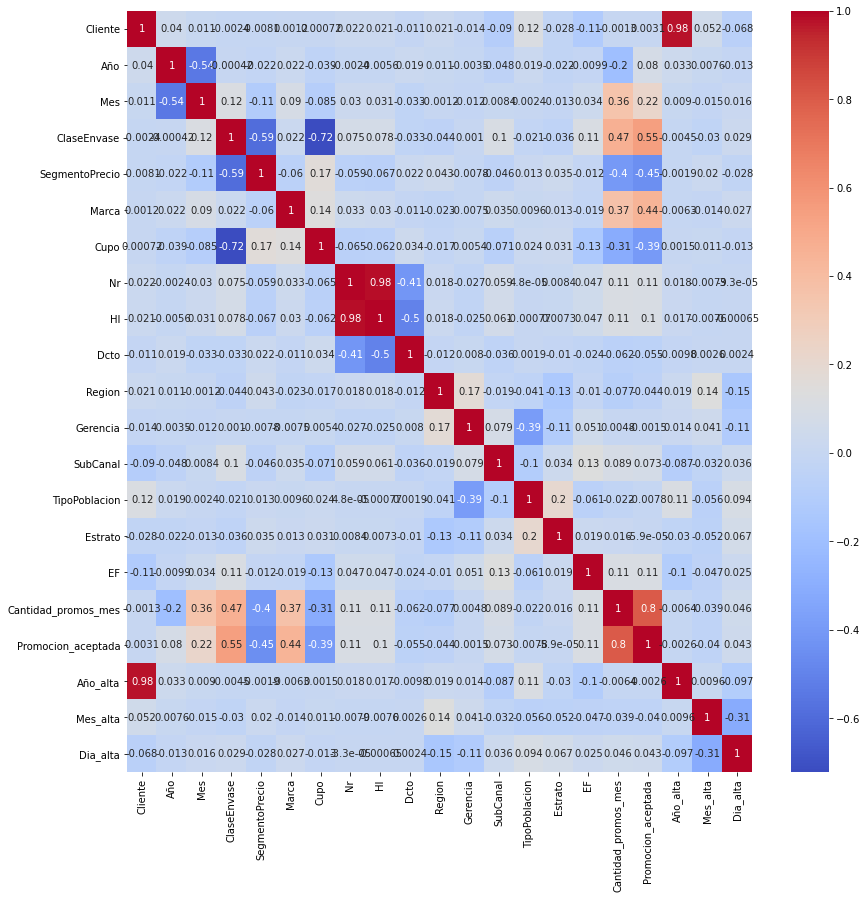

In [43]:
plt.figure(figsize=(14,14))
sns.heatmap(dataframe_output_visualization.corr(),cmap='coolwarm',annot=True)
plt.show()


### A partir del diagrama de correlaciones se puede obtener las variables que influyen más en la aceptación de una promoción

In [56]:
#El listado de variables importantes son los que posean una correlación mayor a 0.4. Adicionalmente, se debe tener el identificador del cliente
variables_importantes=['Cliente','ClaseEnvase','SegmentoPrecio','Marca','Cupo','Cantidad_promos_mes','Promocion_aceptada']

In [57]:
dataframe_variables_que_impactan=dataframe_output_visualization[variables_importantes].copy()

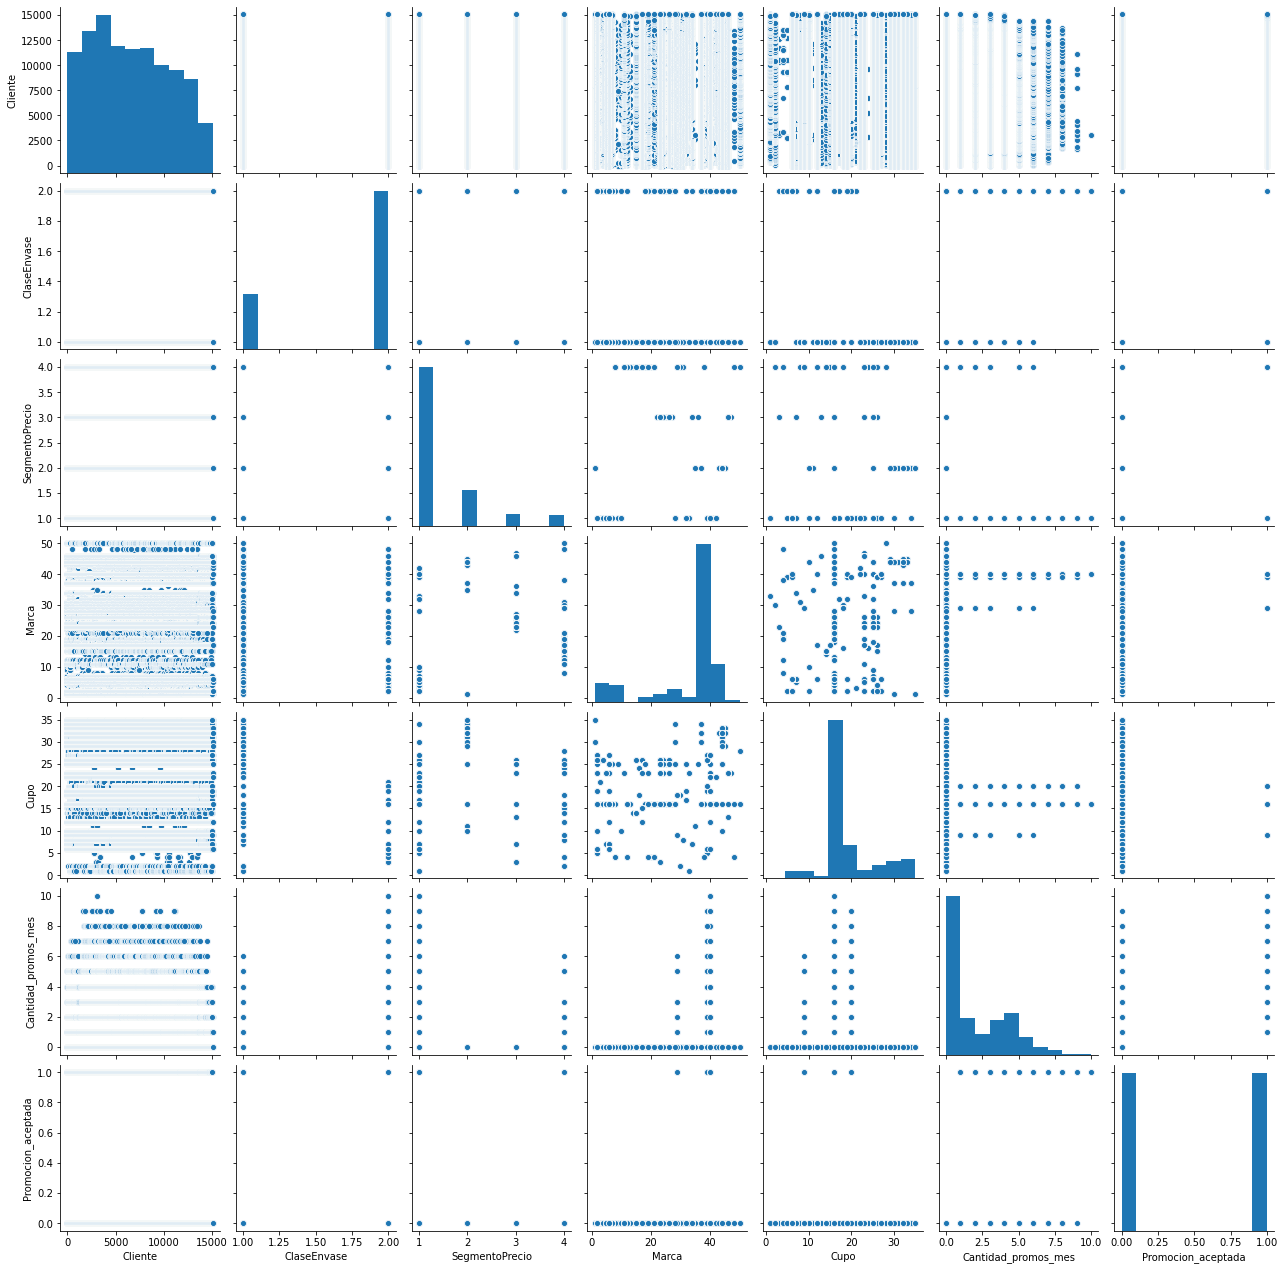

In [60]:
sns.pairplot(dataframe_variables_que_impactan)

### Como se aprecia en el pairplot, algunas variables(Marca,Cupo,SegmentoPrecio) tienen tendencia a predecir si la promoción será aceptada en determinados productos(clustering)

### Analizamos si las variables segmento precio y clase envase son únicas , ya que el output que se solicita no contienen estos atributos

In [150]:
training_set=client_con_promos_union_sin_nulos[variables_importantes].copy()

In [122]:
#Verificamos si la clase envase es único por cada cliente,marca,cupo
training_set_temporal=pd.pivot_table(training_set, values='SegmentoPrecio', index=['Cliente','Marca','Cupo'],columns=['ClaseEnvase'], aggfunc=np.count_nonzero)
display(training_set_temporal)

ClaseEnvase           1     2
Cliente Marca Cupo           
1       1     35.0  2.0   NaN
        2     6.0   NaN   1.0
              16.0  NaN  15.0
              19.0  NaN   2.0
              26.0  9.0   NaN
...                 ...   ...
15069   44    16.0  NaN   2.0
              29.0  6.0   NaN
              30.0  6.0   NaN
              32.0  5.0   NaN
        45    32.0  1.0   NaN

[329490 rows x 2 columns]

In [155]:
#Existen casos en el que por marca y cupo hay los dos tipos de envase
display(training_set_temporal[(training_set_temporal.iloc[:,0] + training_set_temporal.iloc[:,1]).notna()])
print((training_set_temporal.iloc[:,0] + training_set_temporal.iloc[:,1]).notna().value_counts())

ClaseEnvase           1     2
Cliente Marca Cupo           
11      2     16.0  1.0  20.0
61      6     16.0  1.0   1.0
62      23    16.0  1.0   6.0
85      2     16.0  1.0  16.0
        23    16.0  2.0   3.0
...                 ...   ...
14851   2     16.0  1.0   6.0
        6     16.0  1.0   3.0
14938   2     16.0  2.0   2.0
        6     16.0  1.0   1.0
15033   6     16.0  1.0   5.0

[1166 rows x 2 columns]

False    328324
True       1166
dtype: int64


In [156]:
training_set_temporal_2=pd.pivot_table(training_set, values='ClaseEnvase', index=['Cliente','Marca','Cupo'],columns=['SegmentoPrecio'], aggfunc=np.count_nonzero)
display(training_set_temporal_2)

SegmentoPrecio       1.0  2.0  3.0  4.0
Cliente Marca Cupo                     
1       1     35.0   NaN  2.0  NaN  NaN
        2     6.0    1.0  NaN  NaN  NaN
              16.0  15.0  NaN  NaN  NaN
              19.0   2.0  NaN  NaN  NaN
              26.0   9.0  NaN  NaN  NaN
...                  ...  ...  ...  ...
15069   44    16.0   NaN  2.0  NaN  NaN
              29.0   NaN  6.0  NaN  NaN
              30.0   NaN  6.0  NaN  NaN
              32.0   NaN  5.0  NaN  NaN
        45    32.0   NaN  1.0  NaN  NaN

[329490 rows x 4 columns]

In [158]:
# No Existen casos en el que por cliente,marca,cupo haya 2 tipos de segmentoPrecio. Por lo tanto, se usará esta variable
display(training_set_temporal_2[(training_set_temporal_2.iloc[:,0] + training_set_temporal_2.iloc[:,1] + training_set_temporal_2.iloc[:,2] + training_set_temporal_2.iloc[:,3]).notna()])
print((training_set_temporal_2.iloc[:,0] + training_set_temporal_2.iloc[:,1]).notna().value_counts())

,,SegmentoPrecio,1.0,2.0,3.0,4.0
Cliente,Marca,Cupo,,,,


False    329490
dtype: int64


### Eliminamos ClaseEnvase 

In [151]:
training_set_sin_envase=training_set.drop('ClaseEnvase',axis=1)
display(training_set_sin_envase)

,Cliente,SegmentoPrecio,Marca,Cupo,Cantidad_promos_mes,Promocion_aceptada
0,1,2.0,44,10.0,0.0,0.0
1,1,4.0,18,16.0,0.0,0.0
2,1,1.0,2,6.0,0.0,0.0
3,1,2.0,37,34.0,0.0,0.0
4,1,1.0,2,16.0,0.0,0.0
...,...,...,...,...,...,...
1894247,15068,2.0,44,32.0,0.0,0.0
1894248,15069,2.0,44,32.0,0.0,0.0
1894249,15069,2.0,44,32.0,0.0,0.0
1894250,15069,1.0,2,6.0,0.0,0.0


In [163]:
#Agregamos una nueva variable que indica si el cliente recibió promociones
training_set_con_recibio_promociones=training_set_sin_envase.copy()
training_set_con_recibio_promociones['Recibio_promociones']=training_set_con_recibio_promociones['Cantidad_promos_mes'].apply(lambda x: 1 if x>0 else 0)
display(training_set_con_recibio_promociones)
print(training_set_con_recibio_promociones['Recibio_promociones'].value_counts())

,Cliente,SegmentoPrecio,Marca,Cupo,Cantidad_promos_mes,Promocion_aceptada,Recibio_promociones
0,1,2.0,44,10.0,0.0,0.0,0
1,1,4.0,18,16.0,0.0,0.0,0
2,1,1.0,2,6.0,0.0,0.0,0
3,1,2.0,37,34.0,0.0,0.0,0
4,1,1.0,2,16.0,0.0,0.0,0
...,...,...,...,...,...,...,...
1894247,15068,2.0,44,32.0,0.0,0.0,0
1894248,15069,2.0,44,32.0,0.0,0.0,0
1894249,15069,2.0,44,32.0,0.0,0.0,0
1894250,15069,1.0,2,6.0,0.0,0.0,0


0    1843727
1      50520
Name: Recibio_promociones, dtype: int64


In [180]:
# def generar_score(dataframe_base):
#     dataframe_output=dataframe_base.copy()
#     for name_row,value_row in dataframe_output.iterrows():
#         if value_row['Recibio_promociones']==0:
#             dataframe_output.loc['Score']=0
#         else:
#             if value_row['Promocion_aceptada']==1:
#                 dataframe_output.loc['Score']=1/value_row['Cantidad_promos_mes']
#             else:
#                 dataframe_output.loc['Score']=value_row['Cantidad_promos_mes']*-1
#     return dataframe_output
    
            

In [184]:
training_set_groupby=training_set_con_recibio_promociones.groupby(by=['Cliente','Marca','Cupo','SegmentoPrecio']).sum()
display(training_set_groupby)

Cantidad_promos_mes  Promocion_aceptada  \
Cliente Marca Cupo SegmentoPrecio                                            
1       1     35.0 2.0                             0.0                 0.0   
        2     6.0  1.0                             0.0                 0.0   
              16.0 1.0                             0.0                 0.0   
              19.0 1.0                             0.0                 0.0   
              26.0 1.0                             0.0                 0.0   
...                                                ...                 ...   
15069   44    16.0 2.0                             0.0                 0.0   
              29.0 2.0                             0.0                 0.0   
              30.0 2.0                             0.0                 0.0   
              32.0 2.0                             0.0                 0.0   
        45    32.0 2.0                             0.0                 0.0   

                                   Recibio_promociones  
Cliente Marca Cupo SegmentoPrecio                       
1       1     35.0 2.0                               0  
        2     6.0  1.0                               0  
              16.0 1.0                               0  
              19.0 1.0                               0  
              26.0 1.0                               0  
...                                                ...  
15069   44    16.0 2.0                               0  
              29.0 2.0                               0  
              30.0 2.0                               0  
              32.0 2.0                               0  
        45    32.0 2.0                               0  

[329490 rows x 3 columns]

In [191]:
training_set_modelado=training_set_con_recibio_promociones[['Cliente','SegmentoPrecio','Marca','Cupo']]
training_set_modelado_merge=training_set_modelado.merge(training_set_groupby,how='left',right_index=True,left_on=['Cliente','Marca','Cupo','SegmentoPrecio'],right_on=['Cliente','Marca','Cupo','SegmentoPrecio'])
training_set_modelado_merge.rename(columns={'Cantidad_promos_mes':'Cantidad_promos','Promocion_aceptada':'Cantidad_promos_aceptadas','Recibio_promociones':'Cantidad_promos_recibidas'},inplace=True)
display(training_set_modelado)
display(training_set_modelado_merge)
print(training_set_modelado_merge['Cantidad_promos'].value_counts())

,Cliente,SegmentoPrecio,Marca,Cupo
0,1,2.0,44,10.0
1,1,4.0,18,16.0
2,1,1.0,2,6.0
3,1,2.0,37,34.0
4,1,1.0,2,16.0
...,...,...,...,...
1894247,15068,2.0,44,32.0
1894248,15069,2.0,44,32.0
1894249,15069,2.0,44,32.0
1894250,15069,1.0,2,6.0


,Cliente,SegmentoPrecio,Marca,Cupo,Cantidad_promos,Cantidad_promos_aceptadas,Cantidad_promos_recibidas
0,1,2.0,44,10.0,0.0,0.0,0
1,1,4.0,18,16.0,0.0,0.0,0
2,1,1.0,2,6.0,0.0,0.0,0
3,1,2.0,37,34.0,0.0,0.0,0
4,1,1.0,2,16.0,0.0,0.0,0
...,...,...,...,...,...,...,...
1894247,15068,2.0,44,32.0,0.0,0.0,0
1894248,15069,2.0,44,32.0,0.0,0.0,0
1894249,15069,2.0,44,32.0,0.0,0.0,0
1894250,15069,1.0,2,6.0,0.0,0.0,0


0.0     1756564
18.0      14325
16.0       8962
17.0       8164
19.0       7490
21.0       6524
1.0        6278
14.0       6026
20.0       5564
15.0       5266
22.0       5145
23.0       5077
11.0       4723
2.0        4477
4.0        4375
24.0       4328
12.0       3937
13.0       3845
7.0        3793
3.0        3602
10.0       3443
25.0       3435
26.0       3037
8.0        2808
9.0        2512
27.0       2244
5.0        2087
6.0        1865
28.0       1520
29.0       1296
30.0        736
31.0        404
32.0        289
33.0         86
34.0         20
Name: Cantidad_promos, dtype: int64


In [194]:
print(training_set_con_recibio_promociones['Cantidad_promos_mes'].value_counts())

0.0     1843727
1.0       14156
4.0       12133
3.0       11010
2.0        7857
5.0        3133
6.0        1406
7.0         662
8.0         148
9.0          14
10.0          1
Name: Cantidad_promos_mes, dtype: int64


In [193]:
print(training_set_modelado_merge['Cantidad_promos_aceptadas'].value_counts())

0.0     1784716
1.0       27322
2.0       22861
3.0       18452
4.0       14627
5.0       11809
6.0        7725
7.0        4350
8.0        1995
9.0         370
10.0         20
Name: Cantidad_promos_aceptadas, dtype: int64


### Eliminamos los duplicados que ocurrieron por quitar el tipo de envase 

In [500]:
variables_merge=['Cliente','SegmentoPrecio','Marca','Cupo']
print('Número de duplicados '+str(training_set_modelado_merge[variables_merge].duplicated().sum()))
training_set_modelado_merge_sin_duplicados=training_set_modelado_merge.drop(training_set_modelado_merge[training_set_modelado_merge[variables_merge].duplicated()].index)
training_set_modelado_merge_sin_duplicados.reset_index(inplace=True,drop=True)
print(training_set_modelado_merge_sin_duplicados.shape)
display(training_set_modelado_merge_sin_duplicados)

Número de duplicados 1564757
(329490, 7)


,Cliente,SegmentoPrecio,Marca,Cupo,Cantidad_promos,Cantidad_promos_aceptadas,Cantidad_promos_recibidas
0,1,2.0,44,10.0,0.0,0.0,0
1,1,4.0,18,16.0,0.0,0.0,0
2,1,1.0,2,6.0,0.0,0.0,0
3,1,2.0,37,34.0,0.0,0.0,0
4,1,1.0,2,16.0,0.0,0.0,0
...,...,...,...,...,...,...,...
329485,15065,2.0,43,32.0,0.0,0.0,0
329486,15066,1.0,5,23.0,0.0,0.0,0
329487,15066,4.0,17,12.0,0.0,0.0,0
329488,15068,2.0,37,30.0,0.0,0.0,0


### Creando modelo de predicción cuando solo se tiene Cliente,Marca,Cupo

In [508]:
variables_modelo_1=['Cliente','Marca','Cupo','Cantidad_promos_aceptadas']
training_set_modelo_1_pre=training_set_modelado_merge_sin_duplicados[variables_modelo_1]
display(training_set_modelo_1_pre)

,Cliente,Marca,Cupo,Cantidad_promos_aceptadas
0,1,44,10.0,0.0
1,1,18,16.0,0.0
2,1,2,6.0,0.0
3,1,37,34.0,0.0
4,1,2,16.0,0.0
...,...,...,...,...
329485,15065,43,32.0,0.0
329486,15066,5,23.0,0.0
329487,15066,17,12.0,0.0
329488,15068,37,30.0,0.0


In [515]:
#Eliminamos 'Region','Gerencia' por poca correlación
training_set_modelo_1=training_set_modelo_1_pre.copy()
training_set_modelo_1=training_set_modelo_1.merge(clients_attributes_data,how='left',on='Cliente')
# training_set_modelo_1.drop(labels=['Region','Gerencia','Cliente',''])
display(training_set_modelo_1)

,Cliente,Marca,Cupo,Cantidad_promos_aceptadas,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,44,10.0,0.0,2009-03-03,4,21,12,1,1,1
1,1,18,16.0,0.0,2009-03-03,4,21,12,1,1,1
2,1,2,6.0,0.0,2009-03-03,4,21,12,1,1,1
3,1,37,34.0,0.0,2009-03-03,4,21,12,1,1,1
4,1,2,16.0,0.0,2009-03-03,4,21,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
329485,15065,43,32.0,0.0,2019-03-16,4,21,9,2,2,0
329486,15066,5,23.0,0.0,2019-03-17,5,31,9,2,1,0
329487,15066,17,12.0,0.0,2019-03-17,5,31,9,2,1,0
329488,15068,37,30.0,0.0,2019-03-18,1,5,9,2,3,1


In [521]:
training_set_modelo_1_convertido=convertir_a_datetime(training_set_modelo_1,['FechaAltaCliente'])
training_set_modelo_1_convertido['Año_alta']=training_set_modelo_1_convertido['FechaAltaCliente'].dt.year
training_set_modelo_1_convertido['Mes_alta']=training_set_modelo_1_convertido['FechaAltaCliente'].dt.month
training_set_modelo_1_convertido['Dia_alta']=training_set_modelo_1_convertido['FechaAltaCliente'].dt.day
# active_promos_con_executed_promos_convertido_fechas['Duracion_Dias_Promo']=convertir_timedelta_a_float_dias(active_promos_con_executed_promos_convertido_fechas['Fecha_Hasta']-active_promos_con_executed_promos_convertido_fechas['Fecha_Desde'])
training_set_modelo_1_convertido['Cantidad_promos_aceptadas']=training_set_modelo_1_convertido['Cantidad_promos_aceptadas'].apply(lambda x: 1 if x>0 else 0)
training_set_modelo_1_convertido.rename(columns={'Cantidad_promos_aceptadas':'Acepto_promocion'},inplace=True)
training_set_modelo_1_convertido.drop(labels=['FechaAltaCliente'],axis=1,inplace=True)
display(training_set_modelo_1_convertido)
print(training_set_modelo_1_convertido['Acepto_promocion'].value_counts())

,Cliente,Marca,Cupo,Acepto_promocion,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Año_alta,Mes_alta,Dia_alta
0,1,44,10.0,0,4,21,12,1,1,1,2009,3,3
1,1,18,16.0,0,4,21,12,1,1,1,2009,3,3
2,1,2,6.0,0,4,21,12,1,1,1,2009,3,3
3,1,37,34.0,0,4,21,12,1,1,1,2009,3,3
4,1,2,16.0,0,4,21,12,1,1,1,2009,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329485,15065,43,32.0,0,4,21,9,2,2,0,2019,3,16
329486,15066,5,23.0,0,5,31,9,2,1,0,2019,3,17
329487,15066,17,12.0,0,5,31,9,2,1,0,2019,3,17
329488,15068,37,30.0,0,1,5,9,2,3,1,2019,3,18


0    321290
1      8200
Name: Acepto_promocion, dtype: int64


In [522]:
relacion=training_set_modelo_1_convertido[training_set_modelo_1_convertido['Acepto_promocion']==0].shape[0]/training_set_modelo_1_convertido[training_set_modelo_1_convertido['Acepto_promocion']==1].shape[0]
print(relacion)
dataset_oversampling_modelo_1=training_set_modelo_1_convertido[training_set_modelo_1_convertido['Acepto_promocion']==1].copy()
dataframe_output_modelo_1=dataset_oversampling_modelo_1.copy()
time_init=time.time()
for i in range(int(relacion-1)):#El dataset ya posee una réplica de este oversampling
    dataframe_output_modelo_1=pd.concat([dataframe_output_modelo_1,dataset_oversampling_modelo_1],ignore_index=True)
print(dataframe_output_modelo_1.shape)
time_fin=time.time()
print(time_fin-time_init)

39.18170731707317
(319800, 13)
0.9299969673156738


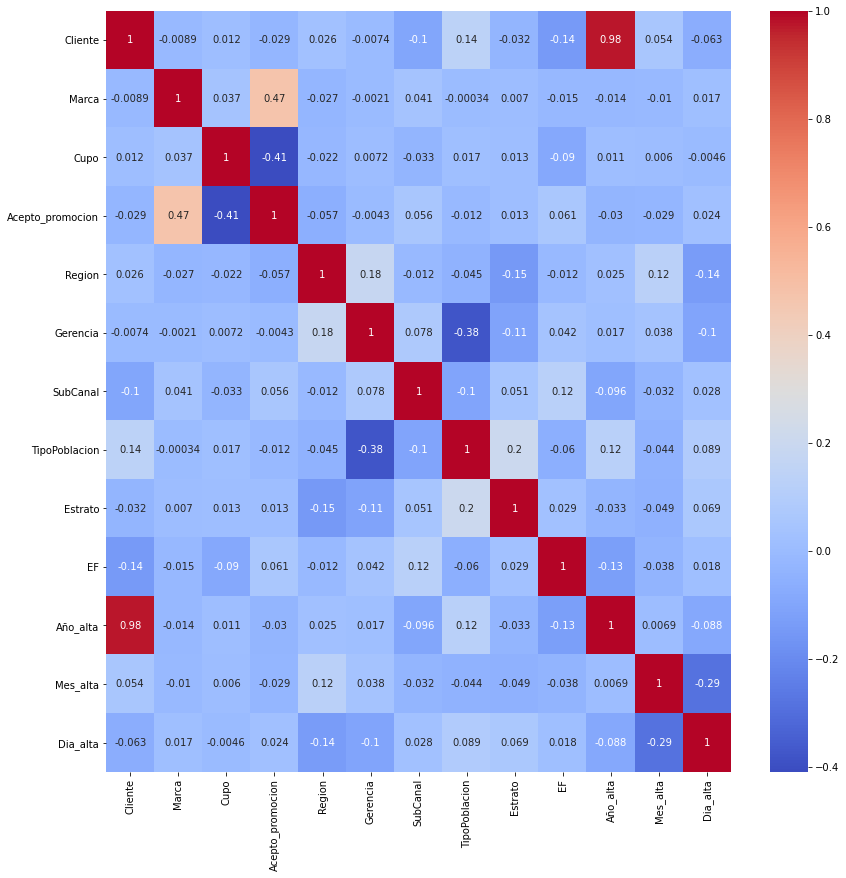

In [530]:
dataframe_output_modelo_1_visualization=pd.concat([dataframe_output_modelo_1,training_set_modelo_1_convertido])
plt.figure(figsize=(14,14))
sns.heatmap(dataframe_output_modelo_1_visualization.corr(),cmap='coolwarm',annot=True)
plt.show()

In [779]:
from sklearn.model_selection import train_test_split
variable_target=['Acepto_promocion']
# features=training_set_modelo_1_convertido.drop(['Cliente','Acepto_promocion'],axis=1)
features=training_set_modelo_1_convertido[['Marca','Cupo','EF']]
target=training_set_modelo_1_convertido[variable_target]
X_train_model_1, X_test_model_1, y_train_model_1, y_test_model_1 = train_test_split(features, target, test_size=0.3,stratify=target, random_state=377)


In [780]:
X_train_model_1

,Marca,Cupo,EF
223862,6,25.0,1
297141,24,25.0,1
210359,40,19.0,1
204261,37,34.0,0
37092,28,30.0,0
...,...,...,...
73616,44,16.0,1
160965,44,32.0,0
124108,37,34.0,1
241631,43,32.0,0


In [781]:
# variables_categoricas=['Marca','Cupo','Region','Gerencia','SubCanal','TipoPoblacion','Estrato']
variables_categoricas=['Marca','Cupo']
X_train_dummies_model_1 = pd.get_dummies(X_train_model_1, columns=variables_categoricas,drop_first=False)
X_test_dummies_model_1 = pd.get_dummies(X_test_model_1, columns=variables_categoricas,drop_first=False)
X_test_dummies_model_1, temp = X_test_dummies_model_1.align(X_train_dummies_model_1, join='right', axis=1,fill_value=0)
display(X_train_dummies_model_1)
display(X_test_dummies_model_1)

,EF,Marca_1,Marca_2,Marca_3,Marca_4,Marca_5,Marca_6,Marca_7,Marca_8,Marca_9,...,Cupo_26.0,Cupo_27.0,Cupo_28.0,Cupo_29.0,Cupo_30.0,Cupo_31.0,Cupo_32.0,Cupo_33.0,Cupo_34.0,Cupo_35.0
223862,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297141,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210359,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
37092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73616,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
124108,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
241631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


,EF,Marca_1,Marca_2,Marca_3,Marca_4,Marca_5,Marca_6,Marca_7,Marca_8,Marca_9,...,Cupo_26.0,Cupo_27.0,Cupo_28.0,Cupo_29.0,Cupo_30.0,Cupo_31.0,Cupo_32.0,Cupo_33.0,Cupo_34.0,Cupo_35.0
71691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121169,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311199,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
155741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42682,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42107,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
258790,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1063,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [791]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score,make_scorer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
params={
 "learning_rate"    : [0.1,0.2,0.3,0.5 ] ,
 "max_depth"        : [ 2, 15,30],
 "min_child_weight" : [3],
 "gamma"            : [0.1,0.01,0.001],
 "colsample_bytree" : [0.2,0.3,0.4,0.5,0.6,0.7]
}
    
f1_score_d=make_scorer(f1_score,average = 'micro')
xgb= XGBClassifier(random_state=133)

xgb_model_1=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring=f1_score_d,n_jobs=-1,cv=5,verbose=3)
xgb_model_1.fit(X_train_dummies_model_1,y_train_model_1)
print(xgb_model_1.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  4.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.1min finished
D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'min_child_weight': 3, 'max_depth': 30, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}


accuracy: 0.9858366971177679
average_precision: 0.7131694467031728
areaUnderROC: 0.9942597996508148 

************************************************************
                     classification_report
************************************************************ 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     96387
           1       0.66      0.88      0.76      2460

    accuracy                           0.99     98847
   macro avg       0.83      0.94      0.87     98847
weighted avg       0.99      0.99      0.99     98847

************************************************************
                     confusion_matrix 

************************************************************ 



array([[95277,  1110],
       [  290,  2170]], dtype=int64)

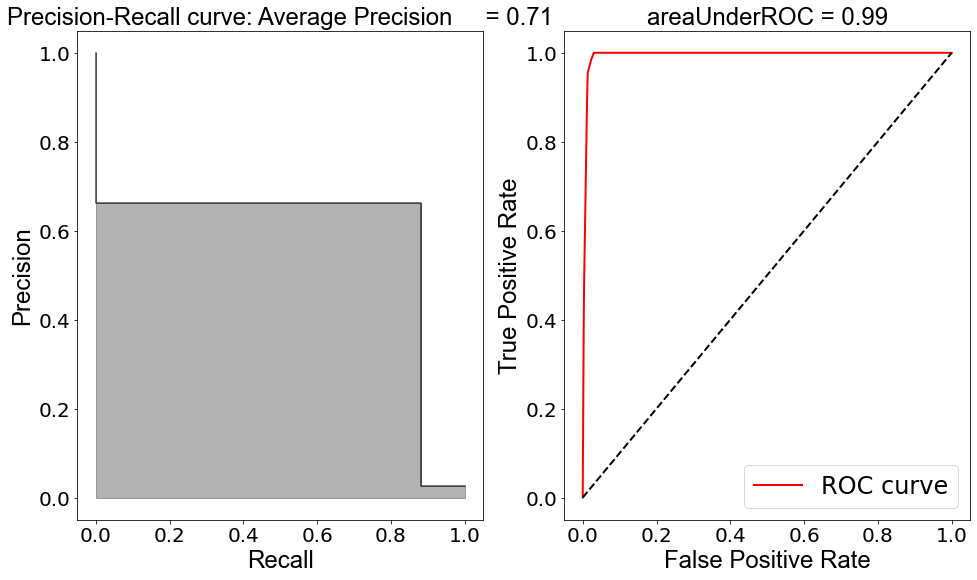

In [792]:
xgb_model_1_best=xgb_model_1.best_estimator_
y_pred_model1=xgb_model_1_best.predict_proba(X_test_dummies_model_1)
metrics_summary(y_test_model_1,y_pred_model1[:,-1])

In [782]:
from sklearn.ensemble import RandomForestClassifier
rf_model1 = RandomForestClassifier(random_state=377)
rf_model1.fit(X_train_dummies_model_1,y_train_model_1)
y_pred_model1=rf_model1.predict_proba(X_test_dummies_model_1)


D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy: 0.9858366971177679
average_precision: 0.7131694467031728
areaUnderROC: 0.9942597996508149 

************************************************************
                     classification_report
************************************************************ 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     96387
           1       0.66      0.88      0.76      2460

    accuracy                           0.99     98847
   macro avg       0.83      0.94      0.87     98847
weighted avg       0.99      0.99      0.99     98847

************************************************************
                     confusion_matrix 

************************************************************ 



array([[95277,  1110],
       [  290,  2170]], dtype=int64)



Features sorted by their score:
[(0.7576, 'Marca_1'), (0.2182, 'Marca_2'), (0.0138, 'Marca_5'), (0.0058, 'Marca_4'), (0.0023, 'Marca_3'), (0.0022, 'EF')]


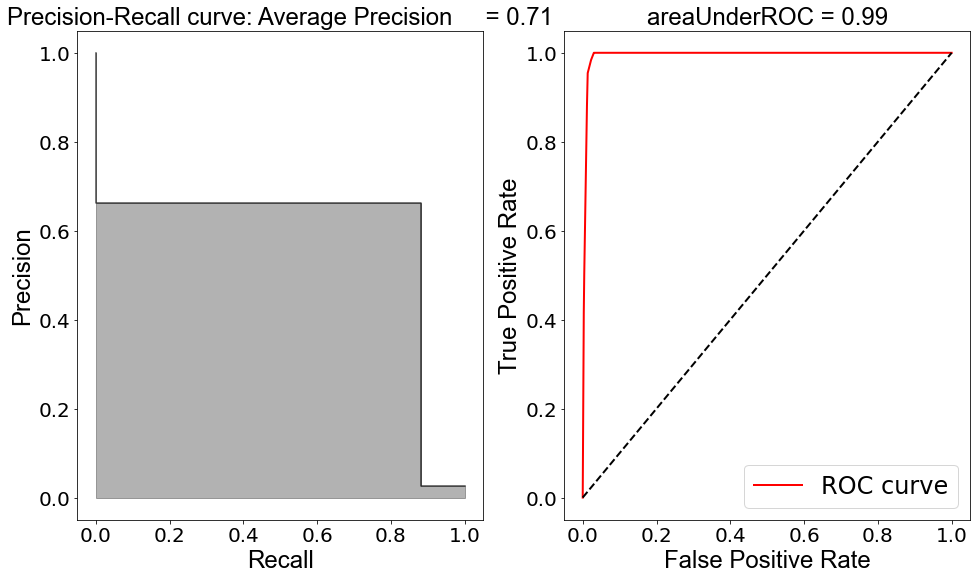

In [783]:
metrics_summary(y_test_model_1,y_pred_model1[:,1])
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train_dummies_model_1.columns.values), 
             reverse=True))

In [787]:
from xgboost import XGBClassifier
xgb_model_1= XGBClassifier(random_state=133).fit(X_train_dummies_model_1,y_train_model_1)
y_pred_model1=xgb_model_1.predict_proba(X_test_dummies_model_1)

D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy: 0.9858366971177679
average_precision: 0.7131694467031728
areaUnderROC: 0.9942597996508149 

************************************************************
                     classification_report
************************************************************ 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     96387
           1       0.66      0.88      0.76      2460

    accuracy                           0.99     98847
   macro avg       0.83      0.94      0.87     98847
weighted avg       0.99      0.99      0.99     98847

************************************************************
                     confusion_matrix 

************************************************************ 



array([[95277,  1110],
       [  290,  2170]], dtype=int64)

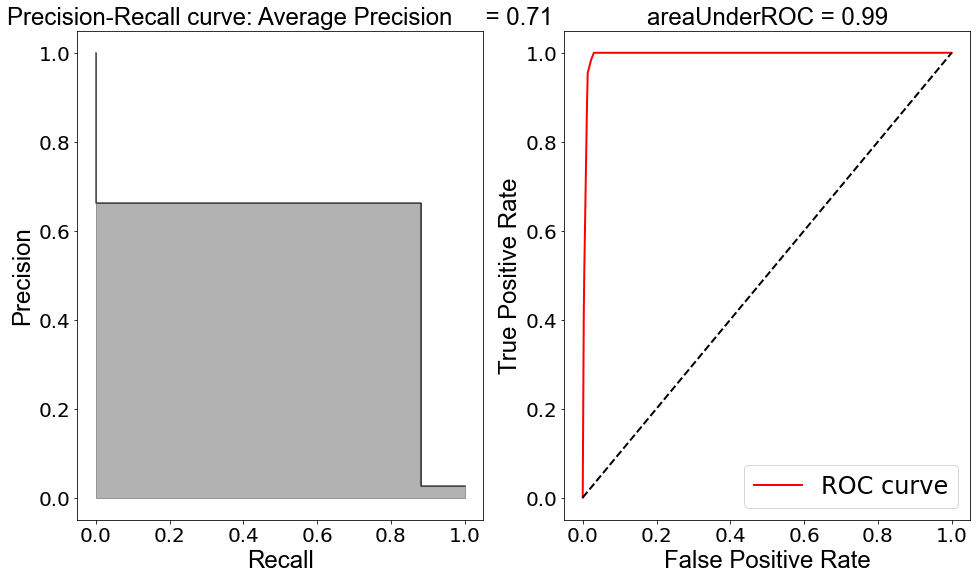

In [788]:
metrics_summary(y_test_model_1,y_pred_model1[:,-1])

###  Creando segundo modelo de predicción cuando solo se tiene Cliente,Marca,Cupo y SegmentoPrecio, pero su cantidad_promos es 0

In [740]:
variables_modelo_2=['Cliente','Marca','Cupo','SegmentoPrecio','Cantidad_promos_aceptadas']
training_set_modelo_2_pre=training_set_modelado_merge_sin_duplicados[variables_modelo_2]
training_set_modelo_2_pre['Cantidad_promos_aceptadas']=training_set_modelo_2_pre['Cantidad_promos_aceptadas'].apply(lambda x: 1 if x>0 else 0)
display(training_set_modelo_2_pre)
print(training_set_modelo_2_pre['Cantidad_promos_aceptadas'].value_counts())

D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cliente,Marca,Cupo,SegmentoPrecio,Cantidad_promos_aceptadas
0,1,44,10.0,2.0,0
1,1,18,16.0,4.0,0
2,1,2,6.0,1.0,0
3,1,37,34.0,2.0,0
4,1,2,16.0,1.0,0
...,...,...,...,...,...
329485,15065,43,32.0,2.0,0
329486,15066,5,23.0,1.0,0
329487,15066,17,12.0,4.0,0
329488,15068,37,30.0,2.0,0


0    321290
1      8200
Name: Cantidad_promos_aceptadas, dtype: int64


In [741]:
#Eliminamos 'Region','Gerencia' por poca correlación
training_set_modelo_2=training_set_modelo_2_pre.copy()
training_set_modelo_2=training_set_modelo_2.merge(clients_attributes_data,how='left',on='Cliente')
# training_set_modelo_1.drop(labels=['Region','Gerencia','Cliente',''])
display(training_set_modelo_2)
training_set_modelo_2_convertido=convertir_a_datetime(training_set_modelo_2,['FechaAltaCliente'])
training_set_modelo_2_convertido['Año_alta']=training_set_modelo_2_convertido['FechaAltaCliente'].dt.year
training_set_modelo_2_convertido['Mes_alta']=training_set_modelo_2_convertido['FechaAltaCliente'].dt.month
training_set_modelo_2_convertido['Dia_alta']=training_set_modelo_2_convertido['FechaAltaCliente'].dt.day
# active_promos_con_executed_promos_convertido_fechas['Duracion_Dias_Promo']=convertir_timedelta_a_float_dias(active_promos_con_executed_promos_convertido_fechas['Fecha_Hasta']-active_promos_con_executed_promos_convertido_fechas['Fecha_Desde'])
training_set_modelo_2_convertido['Cantidad_promos_aceptadas']=training_set_modelo_2_convertido['Cantidad_promos_aceptadas'].apply(lambda x: 1 if x>0 else 0)
training_set_modelo_2_convertido.rename(columns={'Cantidad_promos_aceptadas':'Acepto_promocion'},inplace=True)
training_set_modelo_2_convertido.drop(labels=['FechaAltaCliente'],axis=1,inplace=True)
display(training_set_modelo_2_convertido)
print(training_set_modelo_2_convertido['Acepto_promocion'].value_counts())

,Cliente,Marca,Cupo,SegmentoPrecio,Cantidad_promos_aceptadas,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,44,10.0,2.0,0,2009-03-03,4,21,12,1,1,1
1,1,18,16.0,4.0,0,2009-03-03,4,21,12,1,1,1
2,1,2,6.0,1.0,0,2009-03-03,4,21,12,1,1,1
3,1,37,34.0,2.0,0,2009-03-03,4,21,12,1,1,1
4,1,2,16.0,1.0,0,2009-03-03,4,21,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
329485,15065,43,32.0,2.0,0,2019-03-16,4,21,9,2,2,0
329486,15066,5,23.0,1.0,0,2019-03-17,5,31,9,2,1,0
329487,15066,17,12.0,4.0,0,2019-03-17,5,31,9,2,1,0
329488,15068,37,30.0,2.0,0,2019-03-18,1,5,9,2,3,1


,Cliente,Marca,Cupo,SegmentoPrecio,Acepto_promocion,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Año_alta,Mes_alta,Dia_alta
0,1,44,10.0,2.0,0,4,21,12,1,1,1,2009,3,3
1,1,18,16.0,4.0,0,4,21,12,1,1,1,2009,3,3
2,1,2,6.0,1.0,0,4,21,12,1,1,1,2009,3,3
3,1,37,34.0,2.0,0,4,21,12,1,1,1,2009,3,3
4,1,2,16.0,1.0,0,4,21,12,1,1,1,2009,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329485,15065,43,32.0,2.0,0,4,21,9,2,2,0,2019,3,16
329486,15066,5,23.0,1.0,0,5,31,9,2,1,0,2019,3,17
329487,15066,17,12.0,4.0,0,5,31,9,2,1,0,2019,3,17
329488,15068,37,30.0,2.0,0,1,5,9,2,3,1,2019,3,18


0    321290
1      8200
Name: Acepto_promocion, dtype: int64


In [742]:
from sklearn.model_selection import train_test_split
variable_target=['Acepto_promocion']
# features=training_set_modelo_2_convertido.drop(['Cliente','Acepto_promocion'],axis=1)
features=training_set_modelo_2_convertido[['Marca','Cupo','SegmentoPrecio','EF']]
target=training_set_modelo_2_convertido[variable_target]
X_train_model_2, X_test_model_2, y_train_model_2, y_test_model_2 = train_test_split(features, target, test_size=0.2,stratify=target, random_state=377)


In [743]:
# variables_categoricas=['Marca','Cupo','Region','Gerencia','SubCanal','TipoPoblacion','Estrato','SegmentoPrecio']
variables_categoricas=['Marca','Cupo','SegmentoPrecio']
X_train_dummies_model_2 = pd.get_dummies(X_train_model_2, columns=variables_categoricas,drop_first=False)
X_test_dummies_model_2 = pd.get_dummies(X_test_model_2, columns=variables_categoricas,drop_first=False)
X_test_dummies_model_2, temp = X_test_dummies_model_2.align(X_train_dummies_model_2, join='right', axis=1,fill_value=0)
display(X_train_dummies_model_2)
display(X_test_dummies_model_2)

,EF,Marca_1,Marca_2,Marca_3,Marca_4,Marca_5,Marca_6,Marca_7,Marca_8,Marca_9,...,Cupo_30.0,Cupo_31.0,Cupo_32.0,Cupo_33.0,Cupo_34.0,Cupo_35.0,SegmentoPrecio_1.0,SegmentoPrecio_2.0,SegmentoPrecio_3.0,SegmentoPrecio_4.0
94302,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
228404,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
169667,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
52533,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
144842,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142290,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19278,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
73616,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
241631,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


,EF,Marca_1,Marca_2,Marca_3,Marca_4,Marca_5,Marca_6,Marca_7,Marca_8,Marca_9,...,Cupo_30.0,Cupo_31.0,Cupo_32.0,Cupo_33.0,Cupo_34.0,Cupo_35.0,SegmentoPrecio_1.0,SegmentoPrecio_2.0,SegmentoPrecio_3.0,SegmentoPrecio_4.0
181226,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
129742,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18414,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
160975,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
131225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35757,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
160523,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
240632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
148895,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [793]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score,make_scorer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
params={
 "learning_rate"    : [0.1,0.2,0.3,0.5 ] ,
 "max_depth"        : [ 2, 15,30],
 "min_child_weight" : [3],
 "gamma"            : [0.1,0.01,0.001],
 "colsample_bytree" : [0.2,0.3,0.4,0.5,0.6,0.7]
}
    
f1_score_d=make_scorer(f1_score,average = 'micro')
xgb= XGBClassifier(random_state=133)

xgb_model_2=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring=f1_score_d,n_jobs=-1,cv=5,verbose=3)
xgb_model_2.fit(X_train_dummies_model_2,y_train_model_2)
print(xgb_model_2.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  3.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.8min finished
D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'min_child_weight': 3, 'max_depth': 30, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.2}


accuracy: 0.9858721053749735
average_precision: 0.7070468789773485
areaUnderROC: 0.9942115587391984 

************************************************************
                     classification_report
************************************************************ 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     64258
           1       0.66      0.89      0.76      1640

    accuracy                           0.99     65898
   macro avg       0.83      0.94      0.88     65898
weighted avg       0.99      0.99      0.99     65898

************************************************************
                     confusion_matrix 

************************************************************ 



array([[63508,   750],
       [  181,  1459]], dtype=int64)

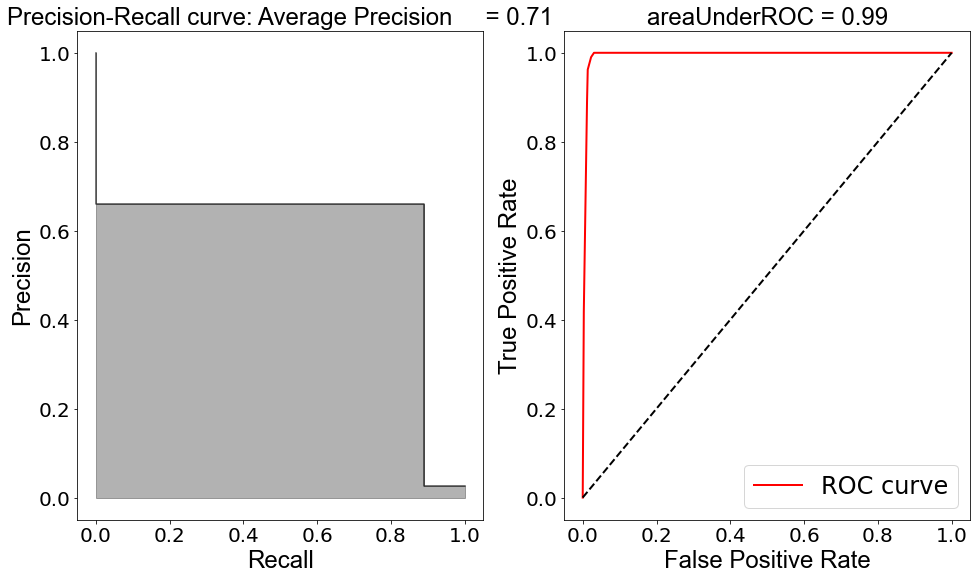

In [794]:
xgb_model_2_best=xgb_model_2.best_estimator_
y_pred_model2=xgb_model_2_best.predict_proba(X_test_dummies_model_2)
metrics_summary(y_test_model_2,y_pred_model2[:,-1])

In [744]:
from sklearn.ensemble import RandomForestClassifier
rf_model2 = RandomForestClassifier(random_state=377)
rf_model2.fit(X_train_dummies_model_2,y_train_model_2)
y_pred_model2=rf_model2.predict_proba(X_test_dummies_model_2)

D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy: 0.9858721053749735
average_precision: 0.711650373704585
areaUnderROC: 0.9942796341577285 

************************************************************
                     classification_report
************************************************************ 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     64258
           1       0.66      0.89      0.76      1640

    accuracy                           0.99     65898
   macro avg       0.83      0.94      0.88     65898
weighted avg       0.99      0.99      0.99     65898

************************************************************
                     confusion_matrix 

************************************************************ 



array([[63508,   750],
       [  181,  1459]], dtype=int64)



Features sorted by their score:
[(0.7576, 'Marca_1'), (0.2182, 'Marca_2'), (0.0138, 'Marca_5'), (0.0058, 'Marca_4'), (0.0023, 'Marca_3'), (0.0022, 'EF')]


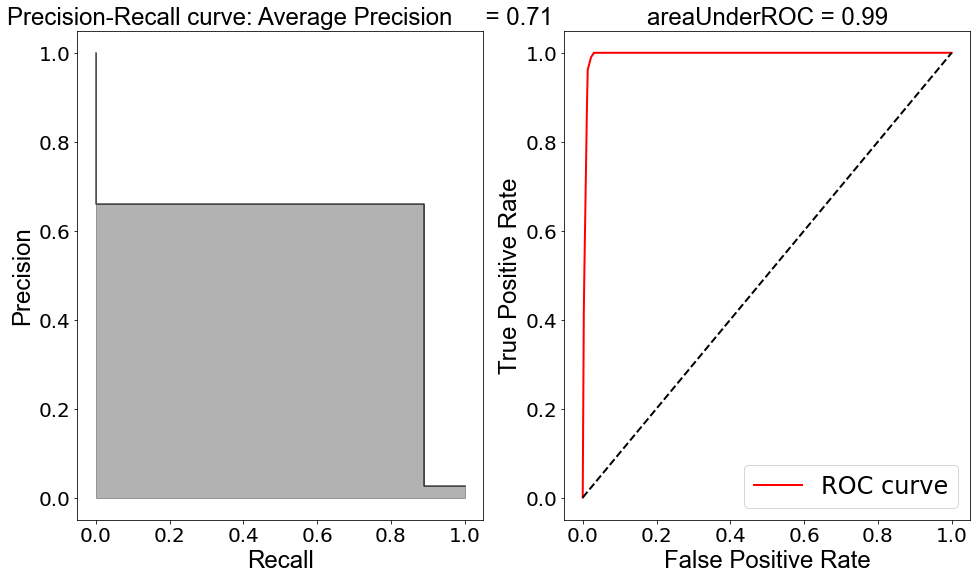

In [745]:
metrics_summary(y_test_model_2,y_pred_model2[:,1])
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train_dummies_model_2.columns.values), 
             reverse=True))

### Creando 3 modelo de predicción 

In [621]:
training_set_modelo_3=training_set_modelado_merge_sin_duplicados[training_set_modelado_merge_sin_duplicados['Cantidad_promos']!=0].copy()
# training_set_modelo_3.drop('Cliente',axis=1,inplace=True)
training_set_modelo_3.reset_index(drop=True,inplace=True)
# training_set_modelo_3['Marca_Cupo']=training_set_modelo_3['Marca'].astype(str)+'-'+training_set_modelo_3['Cupo'].astype(str)
training_set_modelo_3['Porcentaje_campañas_aceptadas']=training_set_modelo_3['Cantidad_promos_aceptadas']/training_set_modelo_3['Cantidad_promos_recibidas']
# training_set_modelo_3.drop(labels=['Marca','Cupo'],axis=1,inplace=True)
display(training_set_modelo_3)

,Cliente,SegmentoPrecio,Marca,Cupo,Cantidad_promos,Cantidad_promos_aceptadas,Cantidad_promos_recibidas,Porcentaje_campañas_aceptadas
0,1,1.0,40,16.0,9.0,1.0,3,0.333333
1,6,1.0,40,16.0,7.0,1.0,2,0.500000
2,8,1.0,40,16.0,15.0,3.0,6,0.500000
3,11,1.0,40,16.0,1.0,1.0,1,1.000000
4,11,4.0,29,9.0,3.0,1.0,2,0.500000
...,...,...,...,...,...,...,...,...
12214,14538,4.0,29,9.0,2.0,0.0,1,0.000000
12215,14558,1.0,40,16.0,1.0,1.0,1,1.000000
12216,14930,1.0,39,20.0,1.0,1.0,1,1.000000
12217,14968,4.0,29,9.0,2.0,0.0,1,0.000000


# Se le asigna un nuevo feature

In [622]:
training_set_modelo_3_con_nuevo_feature=training_set_modelo_3.copy()
training_set_modelo_3_con_nuevo_feature['Cantidad_promos_por_campaña']=training_set_modelo_3['Cantidad_promos']/training_set_modelo_3['Cantidad_promos_recibidas']
training_set_modelo_3_con_nuevo_feature.drop(labels=['Cantidad_promos_recibidas'],axis=1,inplace=True)
training_set_modelo_3_con_nuevo_feature['Cantidad_promos_aceptadas']=training_set_modelo_3_con_nuevo_feature['Cantidad_promos_aceptadas'].apply(lambda x: 1 if x>0 else 0)
training_set_modelo_3_con_nuevo_feature.drop(labels=['Cantidad_promos_aceptadas'],axis=1,inplace=True)
display(training_set_modelo_3_con_nuevo_feature)

,Cliente,SegmentoPrecio,Marca,Cupo,Cantidad_promos,Porcentaje_campañas_aceptadas,Cantidad_promos_por_campaña
0,1,1.0,40,16.0,9.0,0.333333,3.0
1,6,1.0,40,16.0,7.0,0.500000,3.5
2,8,1.0,40,16.0,15.0,0.500000,2.5
3,11,1.0,40,16.0,1.0,1.000000,1.0
4,11,4.0,29,9.0,3.0,0.500000,1.5
...,...,...,...,...,...,...,...
12214,14538,4.0,29,9.0,2.0,0.000000,2.0
12215,14558,1.0,40,16.0,1.0,1.000000,1.0
12216,14930,1.0,39,20.0,1.0,1.000000,1.0
12217,14968,4.0,29,9.0,2.0,0.000000,2.0


In [654]:
#Estimamos la probabilidad que un cliente adquiera una promoción con los features ['Cliente','SegmentoPrecio','Marca','Marca','Cupo']
columna_names_procesar=['Cliente','SegmentoPrecio','Marca','Cupo']
training_set_modelo_3=training_set_modelo_3_con_nuevo_feature[columna_names_procesar].copy()
training_set_modelo_3=training_set_modelo_3.merge(clients_attributes_data,how='left',on='Cliente')
# training_set_modelo_1.drop(labels=['Region','Gerencia','Cliente',''])
display(training_set_modelo_3)
training_set_modelo_3_convertido=convertir_a_datetime(training_set_modelo_3,['FechaAltaCliente'])
training_set_modelo_3_convertido['Año_alta']=training_set_modelo_3_convertido['FechaAltaCliente'].dt.year
training_set_modelo_3_convertido['Mes_alta']=training_set_modelo_3_convertido['FechaAltaCliente'].dt.month
training_set_modelo_3_convertido['Dia_alta']=training_set_modelo_3_convertido['FechaAltaCliente'].dt.day
training_set_modelo_3_convertido.drop(labels=['FechaAltaCliente','Cliente'],axis=1,inplace=True)
display(training_set_modelo_3_convertido)

,Cliente,SegmentoPrecio,Marca,Cupo,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,1.0,40,16.0,2009-03-03,4,21,12,1,1,1
1,6,1.0,40,16.0,2009-03-03,4,21,12,2,3,1
2,8,1.0,40,16.0,2009-03-03,4,21,9,2,3,0
3,11,1.0,40,16.0,2009-03-03,4,21,15,2,4,1
4,11,4.0,29,9.0,2009-03-03,4,21,15,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...
12214,14538,4.0,29,9.0,2018-11-14,3,7,9,2,2,1
12215,14558,1.0,40,16.0,2018-11-18,4,14,9,2,1,0
12216,14930,1.0,39,20.0,2019-02-03,1,23,6,2,3,1
12217,14968,4.0,29,9.0,2019-02-12,1,16,9,2,2,0


,SegmentoPrecio,Marca,Cupo,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Año_alta,Mes_alta,Dia_alta
0,1.0,40,16.0,4,21,12,1,1,1,2009,3,3
1,1.0,40,16.0,4,21,12,2,3,1,2009,3,3
2,1.0,40,16.0,4,21,9,2,3,0,2009,3,3
3,1.0,40,16.0,4,21,15,2,4,1,2009,3,3
4,4.0,29,9.0,4,21,15,2,4,1,2009,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
12214,4.0,29,9.0,3,7,9,2,2,1,2018,11,14
12215,1.0,40,16.0,4,14,9,2,1,0,2018,11,18
12216,1.0,39,20.0,1,23,6,2,3,1,2019,2,3
12217,4.0,29,9.0,1,16,9,2,2,0,2019,2,12


In [655]:
variables_categoricas=['Marca','Cupo','Region','Gerencia','SubCanal','TipoPoblacion','Estrato','SegmentoPrecio']
training_set_modelo_3_dummies = pd.get_dummies(training_set_modelo_3_convertido, columns=variables_categoricas,drop_first=False)
training_set_modelo_3_dummies, temp = training_set_modelo_3_dummies.align(X_train_dummies_model_2, join='right', axis=1,fill_value=0)
display(training_set_modelo_3_dummies)

,EF,Año_alta,Mes_alta,Dia_alta,Marca_1,Marca_2,Marca_3,Marca_4,Marca_5,Marca_6,...,Estrato_1,Estrato_2,Estrato_3,Estrato_4,Estrato_5,Estrato_6,SegmentoPrecio_1.0,SegmentoPrecio_2.0,SegmentoPrecio_3.0,SegmentoPrecio_4.0
0,1,2009,3,3,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,2009,3,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,2009,3,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,2009,3,3,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,2009,3,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12214,1,2018,11,14,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
12215,0,2018,11,18,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
12216,1,2019,2,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
12217,0,2019,2,12,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [795]:
y_pred_model3=xgb_model_2_best.predict_proba(training_set_modelo_3_dummies)
y_pred_model3[:,1]

XGBoostError: [12:00:34] C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:1117: Check failed: learner_model_param_.num_feature >= p_fmat->Info().num_col_ (89 vs. 169) : Number of columns does not match number of features in booster.

In [663]:
training_set_modelo_3_con_nuevo_feature['Probabilidad_Cliente_Acepte']=y_pred_model3[:,1]
display(training_set_modelo_3_con_nuevo_feature)

,Cliente,SegmentoPrecio,Marca,Cupo,Cantidad_promos,Porcentaje_campañas_aceptadas,Cantidad_promos_por_campaña,Probabilidad_Cliente_Acepte
0,1,1.0,40,16.0,9.0,0.333333,3.0,0.802667
1,6,1.0,40,16.0,7.0,0.500000,3.5,0.890000
2,8,1.0,40,16.0,15.0,0.500000,2.5,1.000000
3,11,1.0,40,16.0,1.0,1.000000,1.0,0.920000
4,11,4.0,29,9.0,3.0,0.500000,1.5,0.140000
...,...,...,...,...,...,...,...,...
12214,14538,4.0,29,9.0,2.0,0.000000,2.0,0.010000
12215,14558,1.0,40,16.0,1.0,1.000000,1.0,0.980000
12216,14930,1.0,39,20.0,1.0,1.000000,1.0,0.860000
12217,14968,4.0,29,9.0,2.0,0.000000,2.0,0.020000


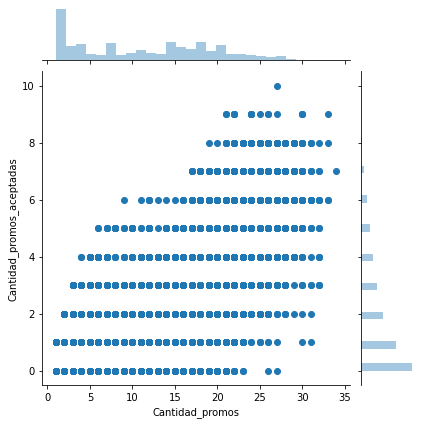

In [378]:
sns.jointplot('Cantidad_promos','Cantidad_promos_aceptadas',data=training_set_modelo_1)

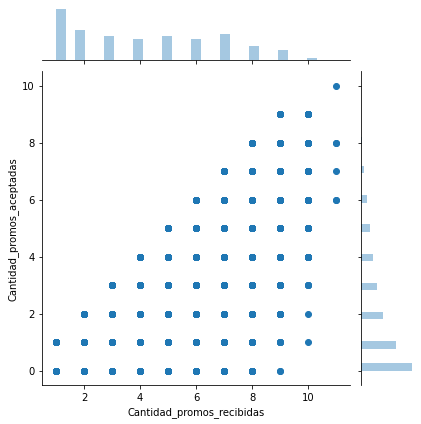

In [379]:
sns.jointplot('Cantidad_promos_recibidas','Cantidad_promos_aceptadas',data=training_set_modelo_1)

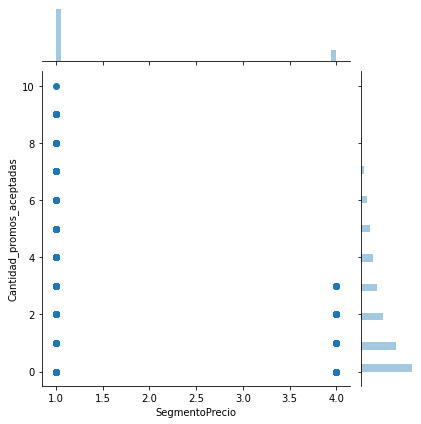

In [380]:
sns.jointplot('SegmentoPrecio','Cantidad_promos_aceptadas',data=training_set_modelo_1)

In [307]:
from sklearn.model_selection import train_test_split
variable_target=['Cantidad_promos_aceptadas']
stratify_target=training_set_modelo_1['Marca_Cupo']
features=training_set_modelo_1.drop(variable_target,axis=1)
target=training_set_modelo_1[variable_target]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,stratify=stratify_target, random_state=377)


In [308]:
#Se realiza el one hot a las variables categóricas y estandarización a las variables numéricas
variables_categoricas=['Marca_Cupo']
X_train_dummies = pd.get_dummies(X_train, columns=variables_categoricas,drop_first=False)
X_test_dummies = pd.get_dummies(X_test, columns=variables_categoricas,drop_first=False)
display(X_train_dummies)
display(X_test_dummies)

,SegmentoPrecio,Cantidad_promos,Cantidad_promos_recibidas,Marca_Cupo_29-9.0,Marca_Cupo_39-20.0,Marca_Cupo_40-16.0
662,1.0,17.0,6,0,0,1
4538,1.0,15.0,5,0,1,0
10841,1.0,14.0,3,0,0,1
9323,1.0,16.0,5,0,0,1
10219,1.0,20.0,8,0,0,1
...,...,...,...,...,...,...
11400,1.0,3.0,1,0,1,0
10181,1.0,22.0,8,0,0,1
11040,1.0,20.0,7,0,0,1
2869,1.0,25.0,9,0,0,1


,SegmentoPrecio,Cantidad_promos,Cantidad_promos_recibidas,Marca_Cupo_29-9.0,Marca_Cupo_39-20.0,Marca_Cupo_40-16.0
676,1.0,4.0,2,0,0,1
744,1.0,23.0,9,0,0,1
1233,1.0,22.0,6,0,0,1
7590,1.0,1.0,1,0,0,1
4751,4.0,2.0,1,1,0,0
...,...,...,...,...,...,...
10308,4.0,1.0,1,1,0,0
12148,1.0,1.0,1,0,0,1
11469,1.0,3.0,1,0,1,0
7562,4.0,2.0,1,1,0,0


### Se le asigna un nuevo feature

In [357]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
variables_numericas=['Cantidad_promos','Cantidad_promos_recibidas']
scaler = RobustScaler()
# scaler=StandardScaler()
X_train_scaled=X_train_dummies.copy()
X_test_scaled=X_test_dummies.copy()
X_train_scaled[variables_numericas] = scaler.fit_transform(X_train_dummies[variables_numericas])
X_test_scaled[variables_numericas] = scaler.transform(X_test_dummies[variables_numericas])

In [358]:
display(X_train_scaled)
display(X_test_scaled)

,SegmentoPrecio,Cantidad_promos,Cantidad_promos_recibidas,Marca_Cupo_29-9.0,Marca_Cupo_39-20.0,Marca_Cupo_40-16.0
662,1.0,0.428571,0.50,0,0,1
4538,1.0,0.285714,0.25,0,1,0
10841,1.0,0.214286,-0.25,0,0,1
9323,1.0,0.357143,0.25,0,0,1
10219,1.0,0.642857,1.00,0,0,1
...,...,...,...,...,...,...
11400,1.0,-0.571429,-0.75,0,1,0
10181,1.0,0.785714,1.00,0,0,1
11040,1.0,0.642857,0.75,0,0,1
2869,1.0,1.000000,1.25,0,0,1


,SegmentoPrecio,Cantidad_promos,Cantidad_promos_recibidas,Marca_Cupo_29-9.0,Marca_Cupo_39-20.0,Marca_Cupo_40-16.0
676,1.0,-0.500000,-0.50,0,0,1
744,1.0,0.857143,1.25,0,0,1
1233,1.0,0.785714,0.50,0,0,1
7590,1.0,-0.714286,-0.75,0,0,1
4751,4.0,-0.642857,-0.75,1,0,0
...,...,...,...,...,...,...
10308,4.0,-0.714286,-0.75,1,0,0
12148,1.0,-0.714286,-0.75,0,0,1
11469,1.0,-0.571429,-0.75,0,1,0
7562,4.0,-0.642857,-0.75,1,0,0


In [359]:
X_train_scaled.columns.values

array(['SegmentoPrecio', 'Cantidad_promos', 'Cantidad_promos_recibidas',
       'Marca_Cupo_29-9.0', 'Marca_Cupo_39-20.0', 'Marca_Cupo_40-16.0'],
      dtype=object)

In [360]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=377)
rf.fit(X_train_scaled,y_train)
y_pred=rf.predict(X_test_scaled)
y_pred=y_pred.reshape(-1,1)
print('RandomForestRegressor: {}'.format(r2_score(y_test,y_pred))) #bajo r2
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train_scaled.columns.values), 
             reverse=True))

D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor: 0.6836214769150984
Features sorted by their score:
[(0.7576, 'Cantidad_promos'), (0.2182, 'Cantidad_promos_recibidas'), (0.0138, 'Marca_Cupo_40-16.0'), (0.0058, 'Marca_Cupo_39-20.0'), (0.0023, 'Marca_Cupo_29-9.0'), (0.0022, 'SegmentoPrecio')]


In [361]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LinearRegression,Ridge
ENet=ElasticNet(random_state=377)
ENet.fit(X_train_scaled,y_train)
y_pred=ENet.predict(X_test_scaled)
y_pred=y_pred.reshape(-1,1)
print('ElasticNet: {}'.format(r2_score(y_test,y_pred)))
Lsso=Lasso(random_state=377)
Lsso.fit(X_train_scaled,y_train)
y_pred=Lsso.predict(X_test_scaled)
y_pred=y_pred.reshape(-1,1)
print('Lasso: {}'.format(r2_score(y_test,y_pred)))
BRidge=BayesianRidge()
BRidge.fit(X_train_scaled,y_train)
y_pred=BRidge.predict(X_test_scaled)
y_pred=y_pred.reshape(-1,1)
print('BayesianRidge: {}'.format(r2_score(y_test,y_pred)))
Lregg=LinearRegression()
Lregg.fit(X_train_scaled,y_train)
y_pred=Lregg.predict(X_test_scaled)
y_pred=y_pred.reshape(-1,1)
print('LinearRegression: {}'.format(r2_score(y_test,y_pred)))
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
y_pred=y_pred.reshape(-1,1)
print('Ridge: {}'.format(r2_score(y_test,y_pred)))

ElasticNet: 0.29325992380677035
Lasso: -1.1654942966288218e-05
BayesianRidge: 0.6201255174812849
LinearRegression: 0.6200919901987689
Ridge: 0.6201193171718651


D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [339]:
import xgboost
import csv as csv
from xgboost import plot_importance
XGBoost=xgboost.XGBRegressor().fit(X_train_scaled,y_train)
y_pred_gboost=XGBoost.predict(X_test_scaled)
y_pred=y_pred_gboost.reshape(-1,1)
print('XGBoost: {}'.format(r2_score(y_test,y_pred))) #bajo r2

XGBoost: 0.6833980716832351


In [362]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import r2_score
GBoost = GradientBoostingRegressor().fit(X_train_scaled,y_train)
y_pred_gboost=GBoost.predict(X_test_scaled)
y_pred=y_pred_gboost.reshape(-1,1)
print('gboost: {}'.format(r2_score(y_test,y_pred))) #bajo r2

D:\Programs\Anaconda3\envs\DataCupBrewing\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


gboost: 0.6866343278023083


In [336]:
y_test_reshape=y_test.values.reshape(-1,1)
r2_score(y_test_reshape,y_pred)

0.6865477570492318

In [337]:
y_pred.shape

(2444, 1)

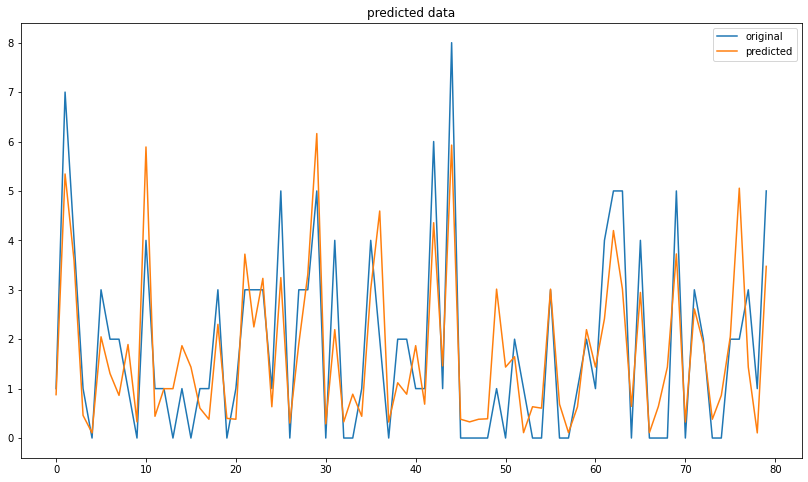

In [338]:
x_ax=range(80)
plt.figure(figsize=(14,8))
plt.plot(x_ax, y_test[:80], label="original")
plt.plot(x_ax, y_pred[:80], label="predicted")
plt.title("predicted data")
plt.legend()
plt.show()

# Test data

In [574]:
dataset_test=pd.read_csv('./Data/test.csv')
display(dataset_test)

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,NaN
1,17,29,9,NaN
2,37,29,9,NaN
3,46,29,9,NaN
4,48,29,9,NaN
...,...,...,...,...
16865,15053,40,16,NaN
16866,15054,40,16,NaN
16867,15056,40,16,NaN
16868,15057,29,9,NaN


# Usamos el dataset sin duplicados como diccionario

In [575]:
training_set_modelado_merge_sin_duplicados

,Cliente,SegmentoPrecio,Marca,Cupo,Cantidad_promos,Cantidad_promos_aceptadas,Cantidad_promos_recibidas
0,1,2.0,44,10.0,0.0,0.0,0
1,1,4.0,18,16.0,0.0,0.0,0
2,1,1.0,2,6.0,0.0,0.0,0
3,1,2.0,37,34.0,0.0,0.0,0
4,1,1.0,2,16.0,0.0,0.0,0
...,...,...,...,...,...,...,...
329485,15065,2.0,43,32.0,0.0,0.0,0
329486,15066,1.0,5,23.0,0.0,0.0,0
329487,15066,4.0,17,12.0,0.0,0.0,0
329488,15068,2.0,37,30.0,0.0,0.0,0


In [576]:
dataset_test_con_caracteristicas=pd.merge(dataset_test,training_set_modelado_merge_sin_duplicados,on=['Cliente','Marca','Cupo'],how='left')
display(dataset_test_con_caracteristicas)

,Cliente,Marca,Cupo,Ejecuto_Promo,SegmentoPrecio,Cantidad_promos,Cantidad_promos_aceptadas,Cantidad_promos_recibidas
0,10,40,16,NaN,1.0,6.0,3.0,3.0
1,17,29,9,NaN,4.0,2.0,0.0,2.0
2,37,29,9,NaN,NaN,NaN,NaN,NaN
3,46,29,9,NaN,4.0,5.0,1.0,3.0
4,48,29,9,NaN,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
16865,15053,40,16,NaN,1.0,1.0,0.0,1.0
16866,15054,40,16,NaN,1.0,2.0,0.0,2.0
16867,15056,40,16,NaN,1.0,8.0,4.0,4.0
16868,15057,29,9,NaN,4.0,0.0,0.0,0.0


### Dividimos el dataset en 3 tipos: los datos que no poseen SegmentoPrecio ,los que Cantidad_promos es 0 y los que si poseen SegmentoPrecio y su Cantidad_promos es mayor a 0

In [681]:
columnas=['Cliente','Marca','Cupo']
dataset_test_sin_segemento_precio=dataset_test_con_caracteristicas[dataset_test_con_caracteristicas['SegmentoPrecio'].isnull()][columnas]
display(dataset_test_sin_segemento_precio)

,Cliente,Marca,Cupo
2,37,29,9
7,94,39,20
9,122,39,20
12,171,39,20
13,184,29,9
...,...,...,...
16852,15000,39,20
16854,15002,39,20
16856,15008,39,20
16857,15014,39,20


In [682]:
#Eliminamos 'Region','Gerencia' por poca correlación
dataset_test_sin_segemento_precio_procesado=dataset_test_sin_segemento_precio.copy()
dataset_test_sin_segemento_precio_procesado=dataset_test_sin_segemento_precio_procesado.merge(clients_attributes_data,how='left',on='Cliente')
# training_set_modelo_1.drop(labels=['Region','Gerencia','Cliente',''])
display(dataset_test_sin_segemento_precio_procesado)
dataset_test_sin_segemento_precio_procesado=convertir_a_datetime(dataset_test_sin_segemento_precio_procesado,['FechaAltaCliente'])
dataset_test_sin_segemento_precio_procesado['Año_alta']=dataset_test_sin_segemento_precio_procesado['FechaAltaCliente'].dt.year
dataset_test_sin_segemento_precio_procesado['Mes_alta']=dataset_test_sin_segemento_precio_procesado['FechaAltaCliente'].dt.month
dataset_test_sin_segemento_precio_procesado['Dia_alta']=dataset_test_sin_segemento_precio_procesado['FechaAltaCliente'].dt.day
dataset_test_sin_segemento_precio_procesado.drop(labels=['FechaAltaCliente','Cliente'],axis=1,inplace=True)
display(dataset_test_sin_segemento_precio_procesado)

,Cliente,Marca,Cupo,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,37,29,9,2009-03-03,4,21,16,2,3,1
1,94,39,20,2009-05-08,4,22,9,2,3,0
2,122,39,20,2009-05-08,4,22,9,1,2,1
3,171,39,20,2009-06-11,4,26,9,2,2,1
4,184,29,9,2009-06-11,4,26,12,1,2,0
...,...,...,...,...,...,...,...,...,...,...
6241,15000,39,20,2019-02-20,4,21,11,2,2,0
6242,15002,39,20,2019-02-21,3,9,16,2,1,0
6243,15008,39,20,2019-02-21,5,29,9,2,2,0
6244,15014,39,20,2019-02-24,3,9,9,2,2,0


,Marca,Cupo,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Año_alta,Mes_alta,Dia_alta
0,29,9,4,21,16,2,3,1,2009,3,3
1,39,20,4,22,9,2,3,0,2009,5,8
2,39,20,4,22,9,1,2,1,2009,5,8
3,39,20,4,26,9,2,2,1,2009,6,11
4,29,9,4,26,12,1,2,0,2009,6,11
...,...,...,...,...,...,...,...,...,...,...,...
6241,39,20,4,21,11,2,2,0,2019,2,20
6242,39,20,3,9,16,2,1,0,2019,2,21
6243,39,20,5,29,9,2,2,0,2019,2,21
6244,39,20,3,9,9,2,2,0,2019,2,24


In [746]:
dataset_test_sin_segemento_precio_procesado_dummies, temp = dataset_test_sin_segemento_precio_procesado.align(X_train_dummies_model_1, join='right', axis=1,fill_value=0)
display(dataset_test_sin_segemento_precio_procesado_dummies)

,EF,Marca_1,Marca_2,Marca_3,Marca_4,Marca_5,Marca_6,Marca_7,Marca_8,Marca_9,...,Cupo_26.0,Cupo_27.0,Cupo_28.0,Cupo_29.0,Cupo_30.0,Cupo_31.0,Cupo_32.0,Cupo_33.0,Cupo_34.0,Cupo_35.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [796]:
y_pred_test_model_1=xgb_model_1_best.predict_proba(dataset_test_sin_segemento_precio_procesado_dummies)
print(y_pred_test_model_1[:,1])

[1.7510722e-05 1.7071083e-05 1.7510722e-05 ... 1.7071083e-05 1.7071083e-05
 1.7510722e-05]


In [797]:
pd.Series(data=y_pred_test_model_1[:,1]).value_counts()

0.000018    3184
0.000017    3062
dtype: int64

In [798]:
dataset_test_sin_segemento_precio['Ejecuto_Promo']=y_pred_test_model_1[:,1]
display(dataset_test_sin_segemento_precio)

,Cliente,Marca,Cupo,Ejecuto_Promo
2,37,29,9,0.000018
7,94,39,20,0.000017
9,122,39,20,0.000018
12,171,39,20,0.000018
13,184,29,9,0.000017
...,...,...,...,...
16852,15000,39,20,0.000017
16854,15002,39,20,0.000017
16856,15008,39,20,0.000017
16857,15014,39,20,0.000017


In [799]:
dataset_test_parte_1=dataset_test_sin_segemento_precio[['Cliente','Marca','Cupo','Ejecuto_Promo']].copy()
display(dataset_test_parte_1)

,Cliente,Marca,Cupo,Ejecuto_Promo
2,37,29,9,0.000018
7,94,39,20,0.000017
9,122,39,20,0.000018
12,171,39,20,0.000018
13,184,29,9,0.000017
...,...,...,...,...
16852,15000,39,20,0.000017
16854,15002,39,20,0.000017
16856,15008,39,20,0.000017
16857,15014,39,20,0.000017


In [800]:
columnas=['Cliente','Marca','Cupo','SegmentoPrecio']
dataset_test_sin_promos=dataset_test_con_caracteristicas[dataset_test_con_caracteristicas['Cantidad_promos']==0][columnas]
display(dataset_test_sin_promos)

,Cliente,Marca,Cupo,SegmentoPrecio
4,48,29,9,4.0
6,56,29,9,4.0
8,95,29,9,4.0
11,167,29,9,4.0
20,206,29,9,4.0
...,...,...,...,...
16831,14825,29,9,4.0
16845,14955,40,16,1.0
16846,14957,39,20,1.0
16853,15001,29,9,4.0


In [688]:
#Eliminamos 'Region','Gerencia' por poca correlación
dataset_test_sin_promos_procesado=dataset_test_sin_promos.copy()
dataset_test_sin_promos_procesado=dataset_test_sin_promos_procesado.merge(clients_attributes_data,how='left',on='Cliente')
# training_set_modelo_1.drop(labels=['Region','Gerencia','Cliente',''])
display(dataset_test_sin_promos_procesado)
dataset_test_sin_promos_procesado=convertir_a_datetime(dataset_test_sin_promos_procesado,['FechaAltaCliente'])
dataset_test_sin_promos_procesado['Año_alta']=dataset_test_sin_promos_procesado['FechaAltaCliente'].dt.year
dataset_test_sin_promos_procesado['Mes_alta']=dataset_test_sin_promos_procesado['FechaAltaCliente'].dt.month
dataset_test_sin_promos_procesado['Dia_alta']=dataset_test_sin_promos_procesado['FechaAltaCliente'].dt.day
dataset_test_sin_promos_procesado.drop(labels=['FechaAltaCliente','Cliente'],axis=1,inplace=True)
display(dataset_test_sin_promos_procesado)

,Cliente,Marca,Cupo,SegmentoPrecio,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,48,29,9,4.0,2009-03-03,4,21,10,2,2,0
1,56,29,9,4.0,2009-05-07,4,22,12,2,2,0
2,95,29,9,4.0,2009-05-08,4,22,7,2,2,0
3,167,29,9,4.0,2009-06-11,4,26,12,2,1,0
4,206,29,9,4.0,2009-06-11,4,26,12,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2009,14825,29,9,4.0,2019-01-13,5,17,9,2,3,0
2010,14955,40,16,1.0,2019-02-08,1,20,1,2,1,0
2011,14957,39,20,1.0,2019-02-10,1,18,7,2,2,0
2012,15001,29,9,4.0,2019-02-21,3,30,10,2,1,0


,Marca,Cupo,SegmentoPrecio,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Año_alta,Mes_alta,Dia_alta
0,29,9,4.0,4,21,10,2,2,0,2009,3,3
1,29,9,4.0,4,22,12,2,2,0,2009,5,7
2,29,9,4.0,4,22,7,2,2,0,2009,5,8
3,29,9,4.0,4,26,12,2,1,0,2009,6,11
4,29,9,4.0,4,26,12,2,1,1,2009,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,29,9,4.0,5,17,9,2,3,0,2019,1,13
2010,40,16,1.0,1,20,1,2,1,0,2019,2,8
2011,39,20,1.0,1,18,7,2,2,0,2019,2,10
2012,29,9,4.0,3,30,10,2,1,0,2019,2,21


In [751]:
dataset_test_sin_promos_procesado_dummies, temp = dataset_test_sin_promos_procesado.align(X_train_dummies_model_2, join='right', axis=1,fill_value=0)
display(dataset_test_sin_promos_procesado_dummies)

,EF,Marca_1,Marca_2,Marca_3,Marca_4,Marca_5,Marca_6,Marca_7,Marca_8,Marca_9,...,Cupo_30.0,Cupo_31.0,Cupo_32.0,Cupo_33.0,Cupo_34.0,Cupo_35.0,SegmentoPrecio_1.0,SegmentoPrecio_2.0,SegmentoPrecio_3.0,SegmentoPrecio_4.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [801]:
y_pred_test_model_2=xgb_model_2_best.predict_proba(dataset_test_sin_promos_procesado_dummies)
print(y_pred_test_model_2[:,1])
pd.Series(data=y_pred_test_model_2[:,1]).value_counts()

[0.00443634 0.00443634 0.00443634 ... 0.00443634 0.00443634 0.00536785]


0.005368    1055
0.004436     959
dtype: int64

In [802]:
dataset_test_sin_promos['Ejecuto_Promo']=y_pred_test_model_2[:,1]
display(dataset_test_sin_promos)

,Cliente,Marca,Cupo,SegmentoPrecio,Ejecuto_Promo
4,48,29,9,4.0,0.004436
6,56,29,9,4.0,0.004436
8,95,29,9,4.0,0.004436
11,167,29,9,4.0,0.004436
20,206,29,9,4.0,0.005368
...,...,...,...,...,...
16831,14825,29,9,4.0,0.004436
16845,14955,40,16,1.0,0.004436
16846,14957,39,20,1.0,0.004436
16853,15001,29,9,4.0,0.004436


In [803]:
dataset_test_parte_2=dataset_test_sin_promos[['Cliente','Marca','Cupo','Ejecuto_Promo']].copy()
display(dataset_test_parte_2)

,Cliente,Marca,Cupo,Ejecuto_Promo
4,48,29,9,0.004436
6,56,29,9,0.004436
8,95,29,9,0.004436
11,167,29,9,0.004436
20,206,29,9,0.005368
...,...,...,...,...
16831,14825,29,9,0.004436
16845,14955,40,16,0.004436
16846,14957,39,20,0.004436
16853,15001,29,9,0.004436


In [351]:
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train_scaled.columns.values), 
             reverse=True))

[(0.7576, 'Cantidad_promos'), (0.2182, 'Cantidad_promos_recibidas'), (0.0138, 'Marca_Cupo_40-16.0'), (0.0058, 'Marca_Cupo_39-20.0'), (0.0023, 'Marca_Cupo_29-9.0'), (0.0022, 'SegmentoPrecio')]


In [692]:
dataset_test_sin_nulos=dataset_test_con_caracteristicas[dataset_test_con_caracteristicas['SegmentoPrecio'].notna()]
display(dataset_test_sin_nulos)

,Cliente,Marca,Cupo,Ejecuto_Promo,SegmentoPrecio,Cantidad_promos,Cantidad_promos_aceptadas,Cantidad_promos_recibidas
0,10,40,16,NaN,1.0,6.0,3.0,3.0
1,17,29,9,NaN,4.0,2.0,0.0,2.0
3,46,29,9,NaN,4.0,5.0,1.0,3.0
4,48,29,9,NaN,4.0,0.0,0.0,0.0
5,53,29,9,NaN,4.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
16865,15053,40,16,NaN,1.0,1.0,0.0,1.0
16866,15054,40,16,NaN,1.0,2.0,0.0,2.0
16867,15056,40,16,NaN,1.0,8.0,4.0,4.0
16868,15057,29,9,NaN,4.0,0.0,0.0,0.0


In [693]:
dataset_test_sin_ceros_cantidad_promos=dataset_test_sin_nulos[dataset_test_sin_nulos['Cantidad_promos']!=0].copy()
display(dataset_test_sin_ceros_cantidad_promos)

,Cliente,Marca,Cupo,Ejecuto_Promo,SegmentoPrecio,Cantidad_promos,Cantidad_promos_aceptadas,Cantidad_promos_recibidas
0,10,40,16,NaN,1.0,6.0,3.0,3.0
1,17,29,9,NaN,4.0,2.0,0.0,2.0
3,46,29,9,NaN,4.0,5.0,1.0,3.0
5,53,29,9,NaN,4.0,1.0,0.0,1.0
10,147,29,9,NaN,4.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
16863,15033,40,16,NaN,1.0,2.0,0.0,2.0
16865,15053,40,16,NaN,1.0,1.0,0.0,1.0
16866,15054,40,16,NaN,1.0,2.0,0.0,2.0
16867,15056,40,16,NaN,1.0,8.0,4.0,4.0


In [694]:
#Estimamos la probabilidad que un cliente adquiera una promoción con los features ['Cliente','SegmentoPrecio','Marca','Marca','Cupo']
columna_names_procesar=['Cliente','SegmentoPrecio','Marca','Cupo']
dataset_test_modelo_3=dataset_test_sin_ceros_cantidad_promos[columna_names_procesar].copy()
dataset_test_modelo_3=dataset_test_modelo_3.merge(clients_attributes_data,how='left',on='Cliente')
# training_set_modelo_1.drop(labels=['Region','Gerencia','Cliente',''])
display(dataset_test_modelo_3)
dataset_test_modelo_3_convertido=convertir_a_datetime(dataset_test_modelo_3,['FechaAltaCliente'])
dataset_test_modelo_3_convertido['Año_alta']=dataset_test_modelo_3_convertido['FechaAltaCliente'].dt.year
dataset_test_modelo_3_convertido['Mes_alta']=dataset_test_modelo_3_convertido['FechaAltaCliente'].dt.month
dataset_test_modelo_3_convertido['Dia_alta']=dataset_test_modelo_3_convertido['FechaAltaCliente'].dt.day
dataset_test_modelo_3_convertido.drop(labels=['FechaAltaCliente','Cliente'],axis=1,inplace=True)
display(dataset_test_modelo_3_convertido)

,Cliente,SegmentoPrecio,Marca,Cupo,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,10,1.0,40,16,2009-03-03,4,21,15,2,2,0
1,17,4.0,29,9,2009-03-03,4,21,15,2,5,1
2,46,4.0,29,9,2009-03-03,4,21,9,2,3,1
3,53,4.0,29,9,2009-05-07,4,22,16,2,1,1
4,147,4.0,29,9,2009-06-11,4,26,9,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
8605,15033,1.0,40,16,2019-03-03,5,11,9,2,2,0
8606,15053,1.0,40,16,2019-03-10,3,10,15,2,3,0
8607,15054,1.0,40,16,2019-03-10,5,27,9,2,1,0
8608,15056,1.0,40,16,2019-03-12,4,26,15,2,2,0


,SegmentoPrecio,Marca,Cupo,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Año_alta,Mes_alta,Dia_alta
0,1.0,40,16,4,21,15,2,2,0,2009,3,3
1,4.0,29,9,4,21,15,2,5,1,2009,3,3
2,4.0,29,9,4,21,9,2,3,1,2009,3,3
3,4.0,29,9,4,22,16,2,1,1,2009,5,7
4,4.0,29,9,4,26,9,2,3,0,2009,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...
8605,1.0,40,16,5,11,9,2,2,0,2019,3,3
8606,1.0,40,16,3,10,15,2,3,0,2019,3,10
8607,1.0,40,16,5,27,9,2,1,0,2019,3,10
8608,1.0,40,16,4,26,15,2,2,0,2019,3,12


In [804]:
# variables_categoricas=['Marca','Cupo','Region','Gerencia','SubCanal','TipoPoblacion','Estrato','SegmentoPrecio']
variables_categoricas=['Marca','Cupo','SegmentoPrecio']
dataset_test_modelo_3_convertido_2=dataset_test_modelo_3_convertido[['Marca','Cupo','SegmentoPrecio','EF']]
dataset_test_modelo_3_dummies = pd.get_dummies(dataset_test_modelo_3_convertido_2, columns=variables_categoricas,drop_first=False)
dataset_test_modelo_3_dummies, temp = dataset_test_modelo_3_dummies.align(X_train_dummies_model_2, join='right', axis=1,fill_value=0)
display(dataset_test_modelo_3_dummies)
y_pred_model3_test=xgb_model_2_best.predict_proba(dataset_test_modelo_3_dummies)
y_pred_model3_test[:,1]

,EF,Marca_1,Marca_2,Marca_3,Marca_4,Marca_5,Marca_6,Marca_7,Marca_8,Marca_9,...,Cupo_30.0,Cupo_31.0,Cupo_32.0,Cupo_33.0,Cupo_34.0,Cupo_35.0,SegmentoPrecio_1.0,SegmentoPrecio_2.0,SegmentoPrecio_3.0,SegmentoPrecio_4.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


array([0.04489172, 0.00911701, 0.00911701, ..., 0.04489172, 0.04489172,
       0.00715093], dtype=float32)

In [805]:
dataset_test_sin_ceros_cantidad_promos['Probabilidad_Cliente_Acepte']=y_pred_model3_test[:,1]
display(dataset_test_sin_ceros_cantidad_promos)

,Cliente,Marca,Cupo,Ejecuto_Promo,SegmentoPrecio,Cantidad_promos,Cantidad_promos_aceptadas,Cantidad_promos_recibidas,Probabilidad_Cliente_Acepte
0,10,40,16,NaN,1.0,6.0,3.0,3.0,0.044892
1,17,29,9,NaN,4.0,2.0,0.0,2.0,0.009117
3,46,29,9,NaN,4.0,5.0,1.0,3.0,0.009117
5,53,29,9,NaN,4.0,1.0,0.0,1.0,0.009117
10,147,29,9,NaN,4.0,1.0,0.0,1.0,0.007151
...,...,...,...,...,...,...,...,...,...
16863,15033,40,16,NaN,1.0,2.0,0.0,2.0,0.044892
16865,15053,40,16,NaN,1.0,1.0,0.0,1.0,0.044892
16866,15054,40,16,NaN,1.0,2.0,0.0,2.0,0.044892
16867,15056,40,16,NaN,1.0,8.0,4.0,4.0,0.044892


In [806]:
dataset_set_modelo_3_con_nuevo_feature=dataset_test_sin_ceros_cantidad_promos.copy()
dataset_set_modelo_3_con_nuevo_feature['Porcentaje_campañas_aceptadas']=dataset_set_modelo_3_con_nuevo_feature['Cantidad_promos_aceptadas']/dataset_set_modelo_3_con_nuevo_feature['Cantidad_promos_recibidas']
dataset_set_modelo_3_con_nuevo_feature['Porcentaje_promos_aceptadas']=dataset_set_modelo_3_con_nuevo_feature['Cantidad_promos_aceptadas']/dataset_set_modelo_3_con_nuevo_feature['Cantidad_promos']
# dataset_set_modelo_3_con_nuevo_feature['Cantidad_promos_por_campaña']=dataset_set_modelo_3_con_nuevo_feature['Cantidad_promos']/dataset_set_modelo_3_con_nuevo_feature['Cantidad_promos_recibidas']
dataset_set_modelo_3_con_nuevo_feature.drop(labels=['Cantidad_promos_recibidas'],axis=1,inplace=True)
display(dataset_set_modelo_3_con_nuevo_feature)

,Cliente,Marca,Cupo,Ejecuto_Promo,SegmentoPrecio,Cantidad_promos,Cantidad_promos_aceptadas,Probabilidad_Cliente_Acepte,Porcentaje_campañas_aceptadas,Porcentaje_promos_aceptadas
0,10,40,16,NaN,1.0,6.0,3.0,0.044892,1.000000,0.5
1,17,29,9,NaN,4.0,2.0,0.0,0.009117,0.000000,0.0
3,46,29,9,NaN,4.0,5.0,1.0,0.009117,0.333333,0.2
5,53,29,9,NaN,4.0,1.0,0.0,0.009117,0.000000,0.0
10,147,29,9,NaN,4.0,1.0,0.0,0.007151,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
16863,15033,40,16,NaN,1.0,2.0,0.0,0.044892,0.000000,0.0
16865,15053,40,16,NaN,1.0,1.0,0.0,0.044892,0.000000,0.0
16866,15054,40,16,NaN,1.0,2.0,0.0,0.044892,0.000000,0.0
16867,15056,40,16,NaN,1.0,8.0,4.0,0.044892,1.000000,0.5


In [874]:
peso_cliente=0.8
peso_campaña=0
peso_promo=0.2
dataset_set_modelo_3_con_nuevo_feature['Ejecuto_Promo']=((dataset_set_modelo_3_con_nuevo_feature['Probabilidad_Cliente_Acepte'])*peso_cliente)+((dataset_set_modelo_3_con_nuevo_feature['Porcentaje_campañas_aceptadas'])*peso_campaña)+((dataset_set_modelo_3_con_nuevo_feature['Porcentaje_promos_aceptadas'])*peso_promo)
display(dataset_set_modelo_3_con_nuevo_feature)

,Cliente,Marca,Cupo,Ejecuto_Promo,SegmentoPrecio,Cantidad_promos,Cantidad_promos_aceptadas,Probabilidad_Cliente_Acepte,Porcentaje_campañas_aceptadas,Porcentaje_promos_aceptadas
0,10,40,16,0.135913,1.0,6.0,3.0,0.044892,1.000000,0.5
1,17,29,9,0.007294,4.0,2.0,0.0,0.009117,0.000000,0.0
3,46,29,9,0.047294,4.0,5.0,1.0,0.009117,0.333333,0.2
5,53,29,9,0.007294,4.0,1.0,0.0,0.009117,0.000000,0.0
10,147,29,9,0.005721,4.0,1.0,0.0,0.007151,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
16863,15033,40,16,0.035913,1.0,2.0,0.0,0.044892,0.000000,0.0
16865,15053,40,16,0.035913,1.0,1.0,0.0,0.044892,0.000000,0.0
16866,15054,40,16,0.035913,1.0,2.0,0.0,0.044892,0.000000,0.0
16867,15056,40,16,0.135913,1.0,8.0,4.0,0.044892,1.000000,0.5


In [875]:
dataset_test_parte_3=dataset_set_modelo_3_con_nuevo_feature[['Cliente','Marca','Cupo','Ejecuto_Promo']].copy()
display(dataset_test_parte_3)

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,0.135913
1,17,29,9,0.007294
3,46,29,9,0.047294
5,53,29,9,0.007294
10,147,29,9,0.005721
...,...,...,...,...
16863,15033,40,16,0.035913
16865,15053,40,16,0.035913
16866,15054,40,16,0.035913
16867,15056,40,16,0.135913


In [876]:
dataset_test_entregar=pd.concat([dataset_test_parte_1,dataset_test_parte_2,dataset_test_parte_3]).sort_index()
display(dataset_test_entregar)

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,0.135913
1,17,29,9,0.007294
2,37,29,9,0.000018
3,46,29,9,0.047294
4,48,29,9,0.004436
...,...,...,...,...
16865,15053,40,16,0.035913
16866,15054,40,16,0.035913
16867,15056,40,16,0.135913
16868,15057,29,9,0.005368


# Crear CSV 

In [877]:
dataset_test_entregar.to_csv(fr'.\NuevaVersion\resultadoV6_{peso_cliente,peso_campaña,peso_promo}.csv', index = False)